We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

Data Description:
Ge given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock ed in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchangeWe usenly 2020 data and predict with 2021 Q1 data.

In today’s data-driven world, we want to forecast future values based on historical data. Time series analysis provides a framework for building a model and predict the trends and patterns. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import autocorrelation_plot

#### Data Preparation 

Read data for various stocks and create dataframes for each. Various share/stock symbols
sber
kchol
mnhd
beef3
pamp
ccb
impj
dsmc

In [61]:
df_sber = pd.read_excel("stocks.xlsx",sheet_name="SBER")

In [62]:
df_kchol = pd.read_excel("stocks.xlsx",sheet_name="KCHOL")

In [63]:
df_mnhd = pd.read_excel("stocks.xlsx",sheet_name="MNHD")

In [64]:
df_beef3 = pd.read_excel("stocks.xlsx",sheet_name="BEEF3")

In [65]:
df_pamp = pd.read_excel("stocks.xlsx",sheet_name="PAMP")

In [66]:
df_ccb = pd.read_excel("stocks.xlsx",sheet_name="CCB")

In [67]:
df_impj = pd.read_excel("stocks.xlsx",sheet_name="IMPJ")

In [68]:
df_dsmc = pd.read_excel("stocks.xlsx",sheet_name="DSMC")

Read few records fot the dataframes

In [69]:
df_sber.tail()

Date           Price                Open             High  \
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol.  Change %  
307           257.01  38.33M   -0.0045  
308           253.03  40.82M    0.0207  
309            251.4  22.35M   -0.0043  
310            253.7  35.85M    0.0010  
311  Change %: 14.24     NaN       NaN

In [70]:
df_kchol.tail()

Date          Price               Open            High  \
311  2020-01-07 00:00:00          19.93              20.22           20.28   
312  2020-01-06 00:00:00          20.08              20.34           20.34   
313  2020-01-03 00:00:00           20.3               20.3           20.44   
314  2020-01-02 00:00:00          20.38              20.42           20.44   
315       Highest: 25.48  Lowest: 12.38  Difference: 13.10  Average: 17.86   

                 Low   Vol.  Change %  
311            19.92  2.89M   -0.0075  
312            19.97  1.94M   -0.0108  
313            19.97  3.31M   -0.0039  
314            20.24  2.53M    0.0030  
315  Change %: -4.48    NaN       NaN

In [71]:
df_mnhd.tail()

Date         Price              Open           High  \
301  2020-01-08 00:00:00          4.41              4.19           4.59   
302  2020-01-06 00:00:00          4.28              4.16           4.44   
303  2020-01-05 00:00:00          4.41               4.7            4.7   
304  2020-01-02 00:00:00          4.81              4.81           4.87   
305        Highest: 4.92  Lowest: 2.40  Difference: 2.52  Average: 3.55   

                  Low     Vol.  Change %  
301              4.15    3.52M    0.0304  
302              4.12    2.52M   -0.0295  
303              4.33    3.76M   -0.0832  
304              4.78  241.60K   -0.0021  
305  Change %: -22.20      NaN       NaN

In [72]:
df_beef3.tail()

Date         Price              Open            High  \
305  2020-01-07 00:00:00         13.48             13.03           13.48   
306  2020-01-06 00:00:00         12.89              12.9           12.91   
307  2020-01-03 00:00:00          12.9             12.45           12.93   
308  2020-01-02 00:00:00         12.57             12.88           12.99   
309       Highest: 15.30  Lowest: 5.81  Difference: 9.49  Average: 11.38   

                  Low   Vol.  Change %  
305             13.03  8.20M    0.0458  
306             12.57  4.17M   -0.0008  
307             12.27  4.88M    0.0263  
308             12.57  5.78M   -0.0210  
309  Change %: -20.56    NaN       NaN

In [73]:
df_pamp.tail()

Date           Price                Open             High  \
296  2020-01-07 00:00:00            47.6               48.35               49   
297  2020-01-06 00:00:00            48.5                48.4             48.7   
298  2020-01-03 00:00:00            48.8               48.25            49.45   
299  2020-01-02 00:00:00           48.25               49.35             50.2   
300      Highest: 90.000  Lowest: 32.000  Difference: 58.000  Average: 61.244   

                  Low     Vol.  Change %  
296              46.9  901.95K   -0.0186  
297                47  719.24K   -0.0061  
298              46.5  595.36K    0.0114  
299             47.55  878.50K   -0.0292  
300  Change %: 71.328      NaN       NaN

In [74]:
df_ccb.tail()

Date            Price                 Open  \
299  2020-01-08 00:00:00             6880                 6940   
300  2020-01-07 00:00:00             6950                 6950   
301  2020-01-03 00:00:00             7000                 7040   
302  2020-01-02 00:00:00             7120                 7300   
303     Highest: 7,300.0  Lowest: 2,415.0  Difference: 4,885.0   

                 High              Low     Vol.  Change %  
299              6950             6880   84.93K   -0.0101  
300              6950             6850  168.71K   -0.0071  
301              7100             6960  470.77K   -0.0169  
302              7300             7120  138.96K   -0.0247  
303  Average: 4,836.5  Change %: -29.5      NaN       NaN

In [75]:
df_impj.tail()

Date          Price                Open             High  \
310  2020-01-07 00:00:00          14500               14688            14688   
311  2020-01-06 00:00:00          14620               14985            15045   
312  2020-01-03 00:00:00          14843               14700            14884   
313  2020-01-02 00:00:00          14330               14525            14764   
314      Highest: 29,777  Lowest: 4,476  Difference: 25,301  Average: 16,018   

              Low   Vol.  Change %  
310         13940  3.94M   -0.0082  
311         14574  2.61M   -0.0150  
312         14360  3.19M    0.0358  
313         14325  2.01M   -0.0015  
314  Change %: 91    NaN       NaN

In [76]:
df_dsmc.tail()

Date          Price                Open            High  \
337  2020-01-07 00:00:00           5690                5740            5770   
338  2020-01-06 00:00:00           5730                5890            5890   
339  2020-01-03 00:00:00           5900                5870            5920   
340  2020-01-02 00:00:00           5850                5930            5980   
341      Highest: 14,200  Lowest: 2,780  Difference: 11,420  Average: 6,492   

               Low     Vol.  Change %  
337           5650  303.89K   -0.0070  
338           5680  319.88K   -0.0288  
339           5830  230.40K    0.0085  
340           5820  239.90K   -0.0168  
341  Change %: 129      NaN       NaN

In [77]:
# Convert values to float
def convert_to_float(df):
    df["Price"]= df["Price"].astype(float)
    df["Open"]= df["Open"].astype(float)
    df["High"]= df["High"].astype(float)
    df["Low"]= df["Low"].astype(float)


In [78]:
# Extract Day Month Week
from datetime import datetime

# def get_day(current):
#         day = current.day
#         return day

def get_year(current):
        year = current.year
        return year

def get_month(current):
        month = current.month
        return month
    
def get_week(current):
        iso_calendar = current.isocalendar()
        week = iso_calendar[1]
        return week

def get_dayofweek(current):
    """
    Get the number of week e.g Wed 3
    """
    day = current.weekday()
    return day

Remove the last rows from dataframe which have the aggregate values

In [79]:
df_sber=df_sber[:-1]
df_kchol = df_kchol[:-1]
df_mnhd = df_mnhd[:-1]
df_beef3 = df_beef3[:-1]
df_pamp = df_pamp[:-1]
df_ccb = df_ccb[:-1]
df_impj = df_impj[:-1]
df_dsmc = df_dsmc[:-1]

In [80]:
convert_to_float(df_sber)
convert_to_float(df_kchol)
convert_to_float(df_mnhd)
convert_to_float(df_beef3)
convert_to_float(df_pamp)
convert_to_float(df_ccb)
convert_to_float(df_impj)
convert_to_float(df_dsmc)

In [81]:
df_sber["Month"]=df_sber["Date"].apply(get_month)
df_sber["Year"]=df_sber["Date"].apply(get_year)
df_sber["Day"]=df_sber["Date"].apply(get_dayofweek)
df_sber["Week"]=df_sber["Date"].apply(get_week)

df_kchol["Month"]=df_kchol["Date"].apply(get_month)
df_kchol["Year"]=df_kchol["Date"].apply(get_year)
df_kchol["Day"]=df_kchol["Date"].apply(get_dayofweek)
df_kchol["Week"]=df_kchol["Date"].apply(get_week)

df_mnhd["Month"]=df_mnhd["Date"].apply(get_month)
df_mnhd["Year"]=df_mnhd["Date"].apply(get_year)
df_mnhd["Day"]=df_mnhd["Date"].apply(get_dayofweek)
df_mnhd["Week"]=df_mnhd["Date"].apply(get_week)

df_beef3["Month"]=df_beef3["Date"].apply(get_month)
df_beef3["Year"]=df_beef3["Date"].apply(get_year)
df_beef3["Day"]=df_beef3["Date"].apply(get_dayofweek)
df_beef3["Week"]=df_beef3["Date"].apply(get_dayofweek)

df_pamp["Month"]=df_pamp["Date"].apply(get_month)
df_pamp["Year"]=df_pamp["Date"].apply(get_year)
df_pamp["Day"]=df_pamp["Date"].apply(get_dayofweek)
df_pamp["Week"]=df_pamp["Date"].apply(get_week)

df_ccb["Month"]=df_ccb["Date"].apply(get_month)
df_ccb["Year"]=df_ccb["Date"].apply(get_year)
df_ccb["Day"]=df_ccb["Date"].apply(get_dayofweek)
df_ccb["Week"]=df_ccb["Date"].apply(get_week)

df_impj["Month"]=df_impj["Date"].apply(get_month)
df_impj["Year"]=df_impj["Date"].apply(get_year)
df_impj["Day"]=df_impj["Date"].apply(get_dayofweek)
df_impj["Week"]=df_impj["Date"].apply(get_week)

df_dsmc["Month"]=df_dsmc["Date"].apply(get_month)
df_dsmc["Year"]=df_dsmc["Date"].apply(get_year)
df_dsmc["Day"]=df_dsmc["Date"].apply(get_dayofweek)
df_dsmc["Week"]=df_dsmc["Date"].apply(get_week)




In [82]:
df_sber.head(15)

Date   Price    Open    High     Low     Vol.  Change %  \
0   2021-03-31 00:00:00  291.02  294.00  294.42  290.26   47.00M   -0.0076   
1   2021-03-30 00:00:00  293.25  294.86  295.72  291.50   38.81M   -0.0002   
2   2021-03-29 00:00:00  293.30  289.72  294.09  289.26   43.68M    0.0071   
3   2021-03-26 00:00:00  291.22  288.63  292.75  288.32   56.07M    0.0159   
4   2021-03-25 00:00:00  286.66  286.50  287.03  283.85   35.22M    0.0030   
5   2021-03-24 00:00:00  285.79  283.40  288.00  282.25   46.41M    0.0113   
6   2021-03-23 00:00:00  282.60  287.56  288.30  282.11   70.76M   -0.0210   
7   2021-03-22 00:00:00  288.65  285.00  291.20  283.08   62.76M    0.0111   
8   2021-03-19 00:00:00  285.47  279.00  286.31  278.03   84.25M    0.0223   
9   2021-03-18 00:00:00  279.25  284.04  285.79  278.24   74.13M   -0.0145   
10  2021-03-17 00:00:00  283.35  292.35  293.25  279.60  110.29M   -0.0307   
11  2021-03-16 00:00:00  292.33  293.06  293.88  288.61   53.92M   -0.0014   
12  2021-03-15 00:00:00  292.74  286.05  292.92  285.28   67.81M    0.0274   
13  2021-03-12 00:00:00  284.93  286.30  287.49  282.82   51.54M   -0.0037   
14  2021-03-11 00:00:00  286.00  283.84  286.38  282.30   47.37M    0.0133   

    Month  Year  Day  Week  
0       3  2021    2    13  
1       3  2021    1    13  
2       3  2021    0    13  
3       3  2021    4    12  
4       3  2021    3    12  
5       3  2021    2    12  
6       3  2021    1    12  
7       3  2021    0    12  
8       3  2021    4    11  
9       3  2021    3    11  
10      3  2021    2    11  
11      3  2021    1    11  
12      3  2021    0    11  
13      3  2021    4    10  
14      3  2021    3    10

#### Descriptive Statistics

In [83]:
df_dsmc.head()

Date    Price     Open     High      Low   Vol.  Change %  \
0  2021-03-31 00:00:00  13650.0  13700.0  13750.0  13450.0  0.19K    0.0000   
1  2021-03-30 00:00:00  13650.0  13850.0  14200.0  13050.0  3.17M    0.0074   
2  2021-03-29 00:00:00  13550.0  12500.0  13800.0  12500.0  0.20K    0.1107   
3  2021-03-28 00:00:00  12200.0  12200.0  12200.0  12200.0      -    0.0000   
4  2021-03-26 00:00:00  12200.0  11500.0  12300.0  11350.0  2.34M    0.0796   

   Month  Year  Day  Week  
0      3  2021    2    13  
1      3  2021    1    13  
2      3  2021    0    13  
3      3  2021    6    12  
4      3  2021    4    12

In [84]:
print(df_dsmc.describe())

              Price          Open          High           Low    Change %  \
count    341.000000    341.000000    341.000000    341.000000  341.000000   
mean    6491.774194   6485.381232   6625.351906   6357.287390    0.003187   
std     1989.697584   1966.249229   2026.491831   1935.762022    0.039583   
min     2780.000000   2785.000000   3280.000000   2780.000000   -0.162100   
25%     5310.000000   5310.000000   5400.000000   5200.000000   -0.014000   
50%     6200.000000   6180.000000   6320.000000   6080.000000    0.000000   
75%     7790.000000   7780.000000   7930.000000   7670.000000    0.014400   
max    13650.000000  13850.000000  14200.000000  13450.000000    0.300000   

            Month         Year         Day        Week  
count  341.000000   341.000000  341.000000  341.000000  
mean     5.709677  2020.202346    2.337243   23.384164  
std      3.595037     0.402339    1.784094   15.863450  
min      1.000000  2020.000000    0.000000    1.000000  
25%      3.000000  20

In [85]:
print(df_sber.describe())

            Price        Open        High         Low    Change %       Month  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean   234.524019  234.417846  237.314759  231.366141    0.000668    5.700965   
std     32.079847   32.058167   32.075624   32.076603    0.021931    3.598024   
min    174.270000  175.000000  182.200000  172.150000   -0.095700    1.000000   
25%    207.700000  207.215000  209.660000  204.475000   -0.010100    2.500000   
50%    229.140000  229.080000  231.950000  226.860000    0.000400    5.000000   
75%    264.380000  263.885000  267.255000  261.110000    0.012950    9.000000   
max    293.300000  294.860000  296.070000  291.500000    0.129000   12.000000   

              Year         Day        Week  
count   311.000000  311.000000  311.000000  
mean   2020.196141    2.012862   23.408360  
std       0.397717    1.420982   15.848592  
min    2020.000000    0.000000    1.000000  
25%    2020.000000    1.000000    9.000000  


Check for null values in the datasets

In [86]:
df_sber.isna().sum()
df_kchol.isna().sum()
df_mnhd.isna().sum()
df_beef3.isna().sum()
df_pamp.isna().sum()
df_ccb.isna().sum()
df_impj.isna().sum()
df_dsmc.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Month       0
Year        0
Day         0
Week        0
dtype: int64

Separate the datasets into dataset of 2020 as Training and 2021 ( Q1) as Test

In [87]:
df_sber_2020 = df_sber[df_sber["Year"]==2020]
df_sber_2021 = df_sber[df_sber["Year"]==2021]
df_kchol_2020 = df_kchol[df_kchol["Year"]==2020]
df_kchol_2021 = df_kchol[df_kchol["Year"]==2021]
df_mnhd_2020 = df_mnhd[df_mnhd["Year"]==2020]
df_mnhd_2021 = df_mnhd[df_mnhd["Year"]==2021]
df_beef3_2020 = df_beef3[df_beef3["Year"]==2020]
df_beef3_2021 = df_beef3[df_beef3["Year"]==2021]
df_pamp_2020 = df_pamp[df_pamp["Year"]==2020]
df_pamp_2021 = df_pamp[df_pamp["Year"]==2021]
df_ccb_2020 = df_ccb[df_ccb["Year"]==2020]
df_ccb_2021 = df_ccb[df_ccb["Year"]==2021]
df_impj_2020 = df_impj[df_impj["Year"]==2020]
df_impj_2021 = df_impj[df_impj["Year"]==2021]
df_dsmc_2020 = df_dsmc[df_dsmc["Year"]==2020]
df_dsmc_2021 = df_dsmc[df_dsmc["Year"]==2021]

Text(0.5, 1.0, 'Stock value for DSMC')

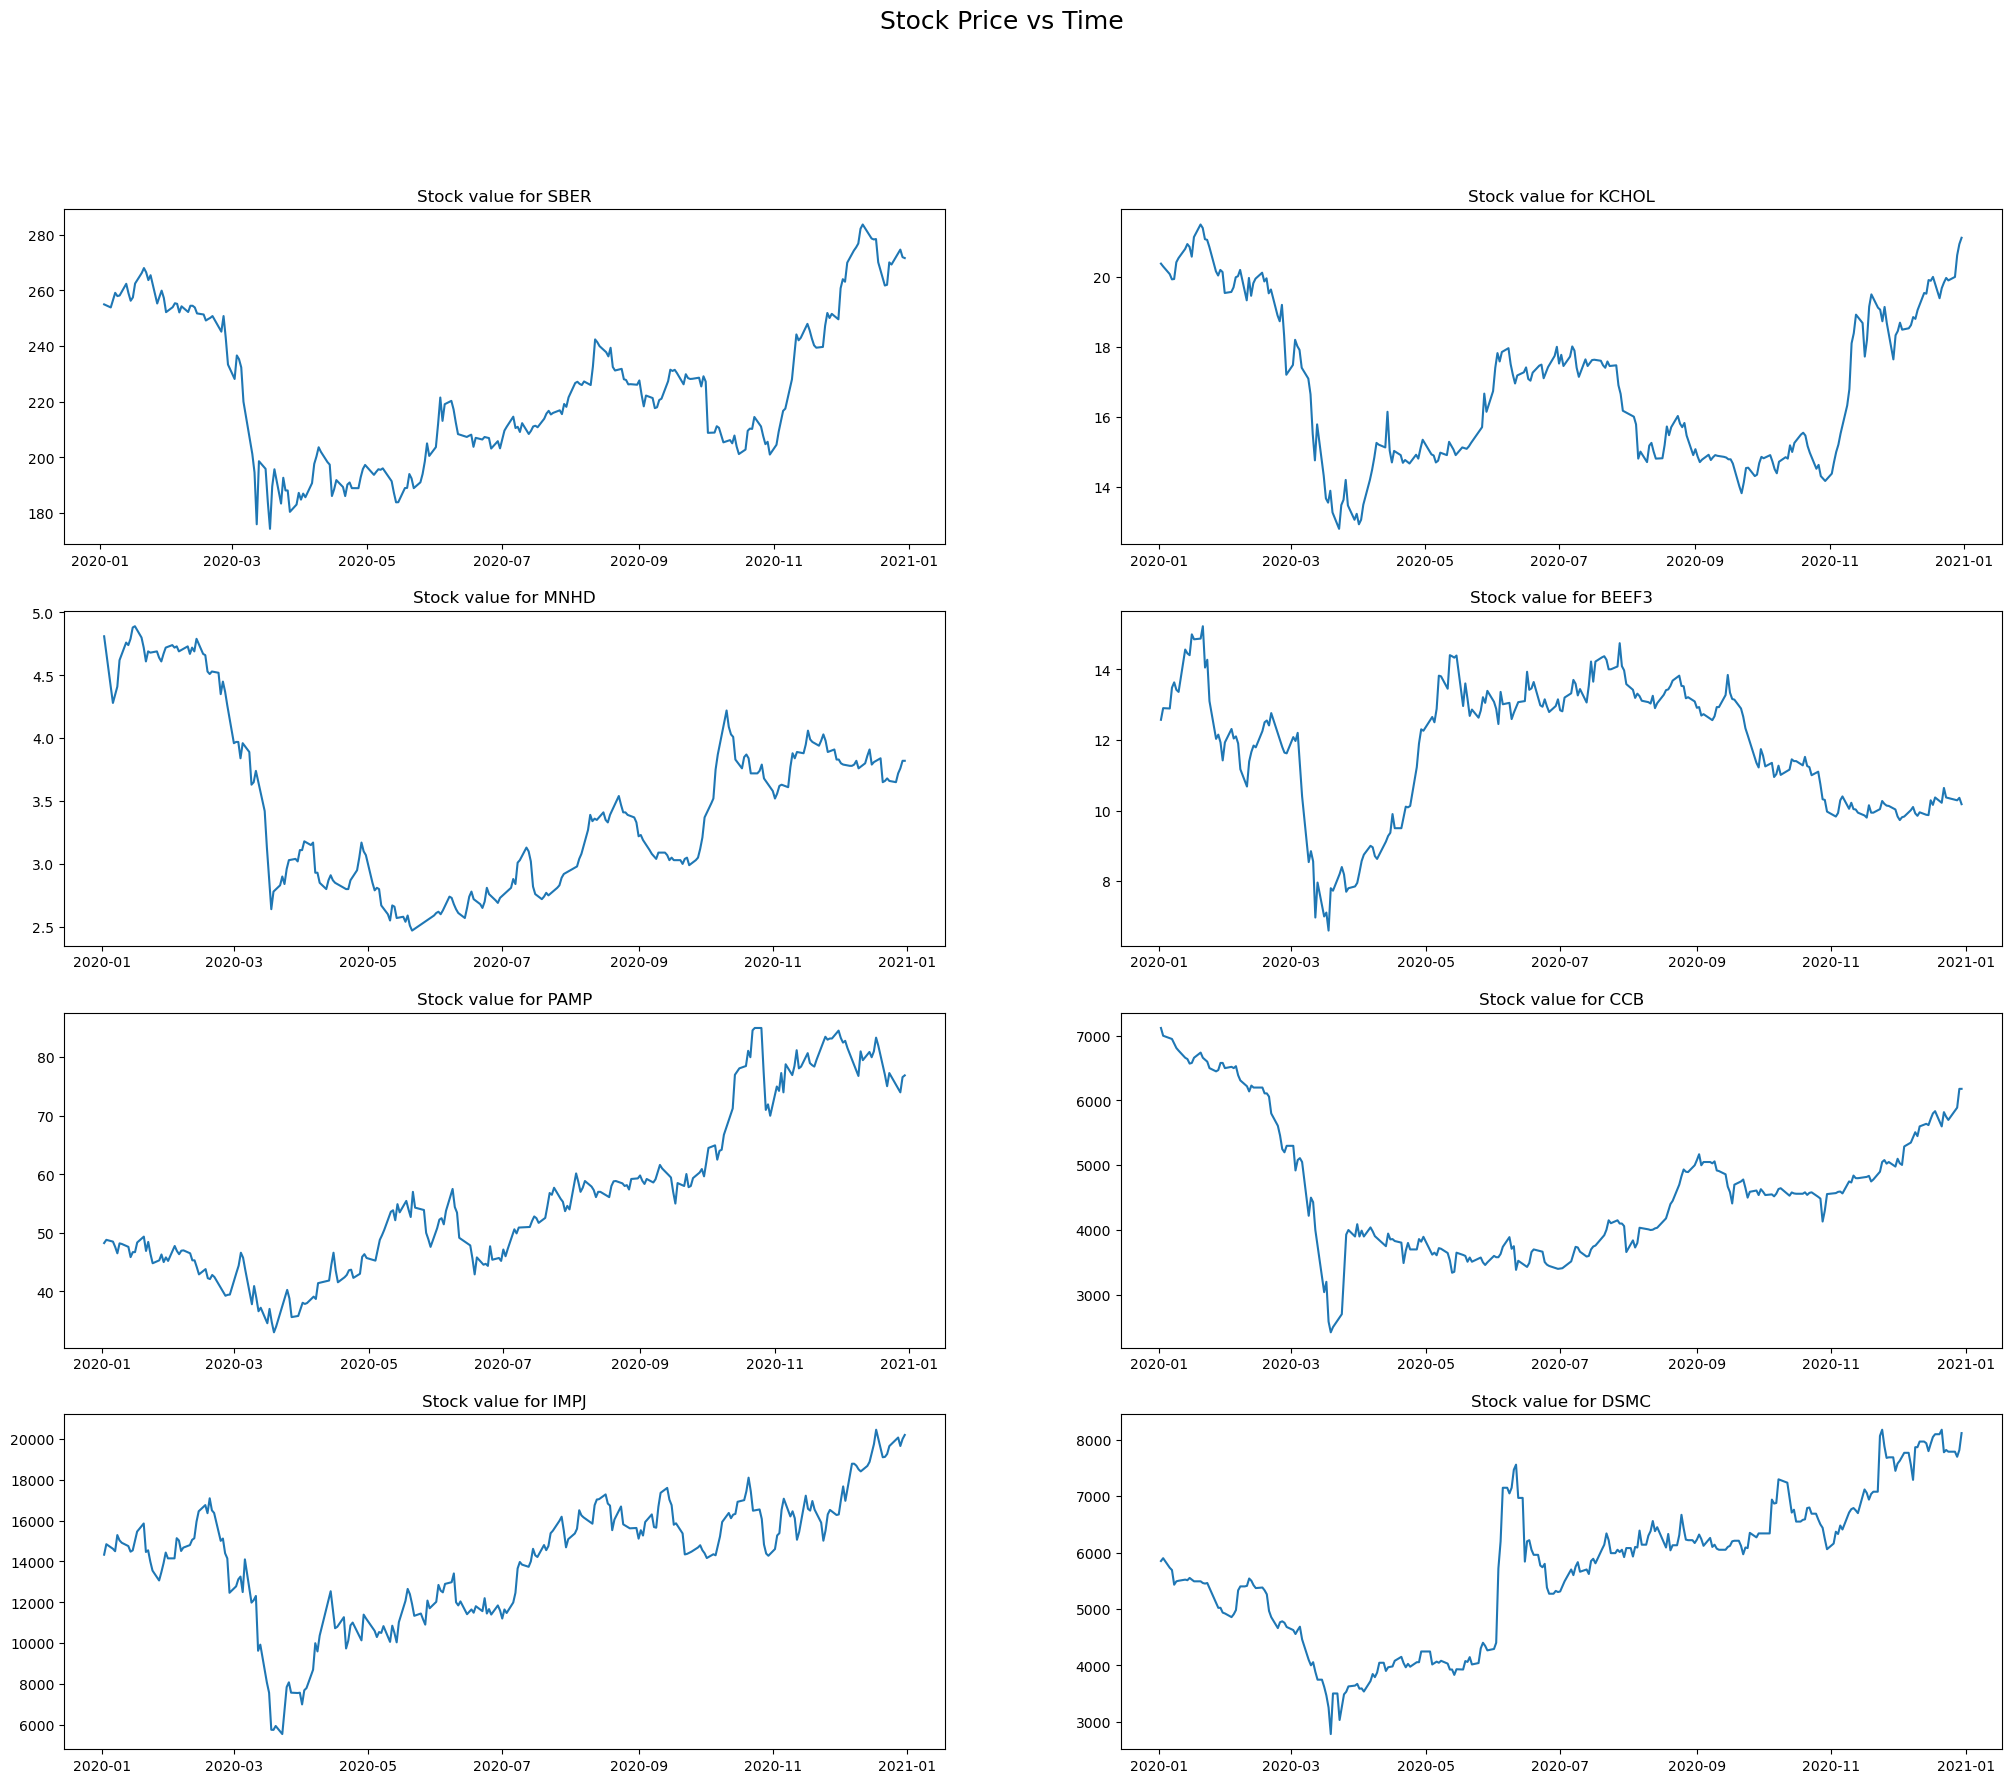

In [88]:
# Plot the Stock Prices with time
fig,ax = plt.subplots(4,2,figsize=(25,20))
plt.suptitle("Stock Price vs Time", fontsize=18)
ax[0,0].plot(df_sber_2020["Date"],df_sber_2020["Price"])
ax[0,0].set_title("Stock value for SBER")
ax[0,1].plot(df_kchol_2020["Date"],df_kchol_2020["Price"])
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].plot(df_mnhd_2020["Date"],df_mnhd_2020["Price"])
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].plot(df_beef3_2020["Date"],df_beef3_2020["Price"])
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].plot(df_pamp_2020["Date"],df_pamp_2020["Price"])
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].plot(df_ccb_2020["Date"],df_ccb_2020["Price"])
ax[2,1].set_title("Stock value for CCB")
ax[3,0].plot(df_impj_2020["Date"],df_impj_2020["Price"])
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].plot(df_dsmc_2020["Date"],df_dsmc_2020["Price"])
ax[3,1].set_title("Stock value for DSMC")


Text(0.5, 1.0, 'Stock value for DSMC')

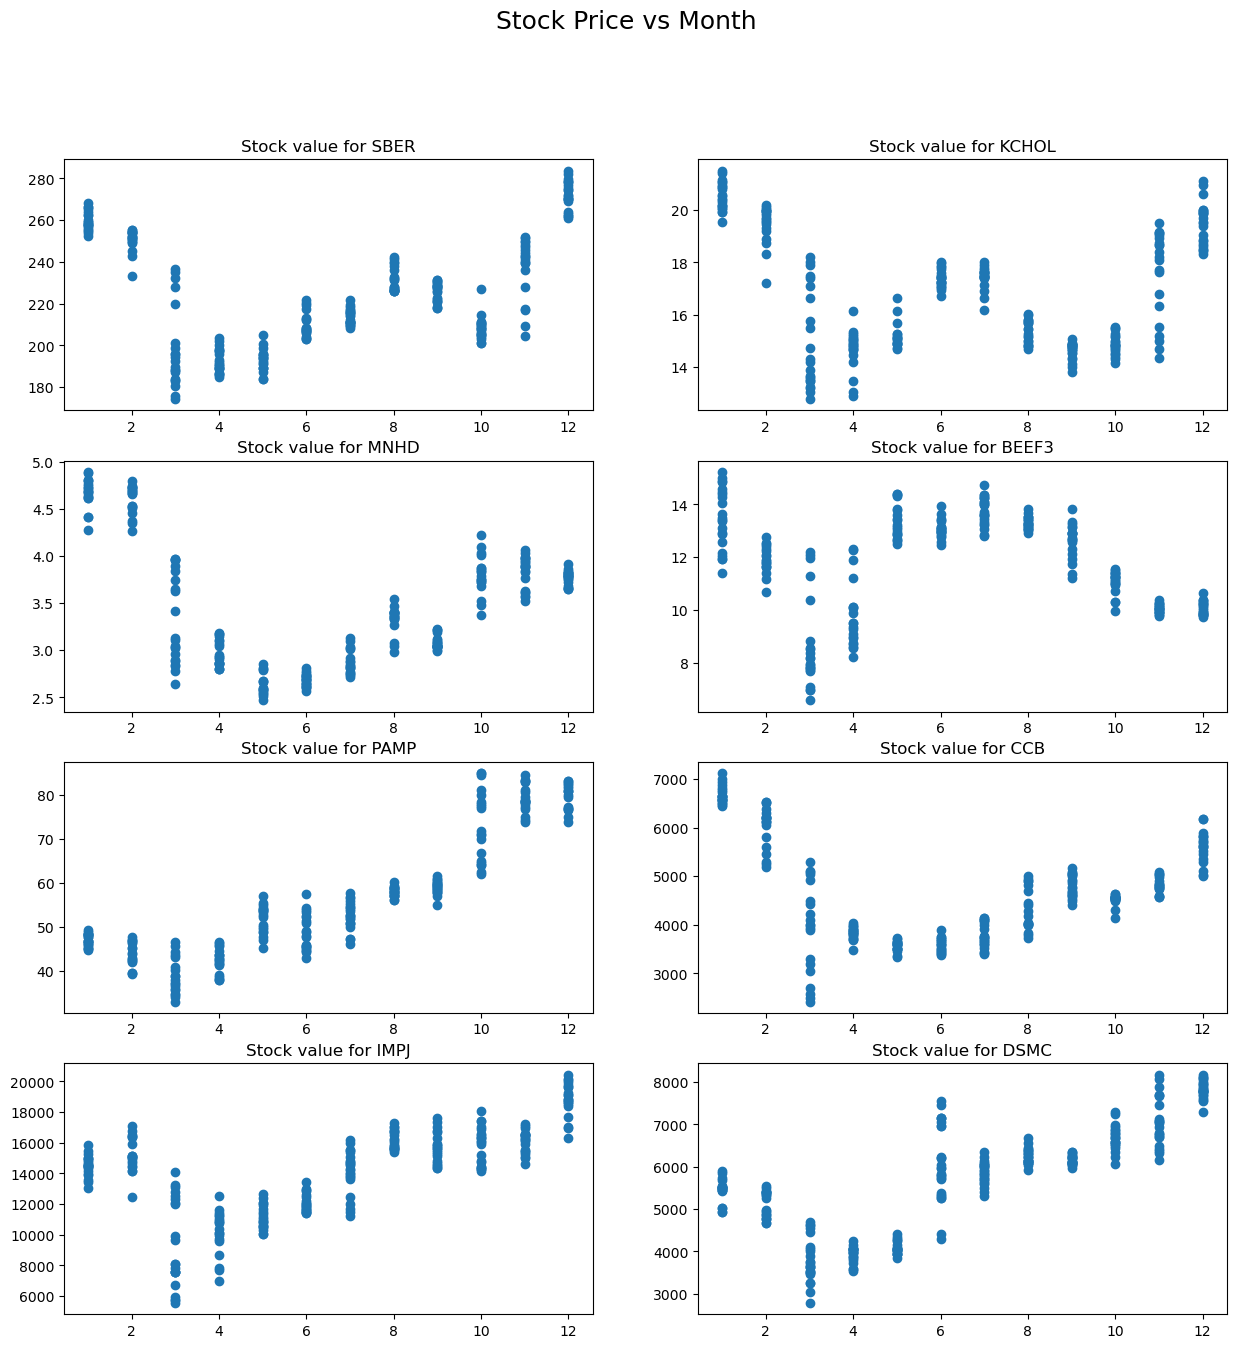

In [89]:
# Plot the stock prices each Month
fig,ax = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Stock Price vs Month", fontsize=18)
ax[0,0].scatter(df_sber_2020["Month"],df_sber_2020["Price"])
ax[0,0].set_title("Stock value for SBER")
ax[0,1].scatter(df_kchol_2020["Month"],df_kchol_2020["Price"])
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].scatter(df_mnhd_2020["Month"],df_mnhd_2020["Price"])
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].scatter(df_beef3_2020["Month"],df_beef3_2020["Price"])
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].scatter(df_pamp_2020["Month"],df_pamp_2020["Price"])
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].scatter(df_ccb_2020["Month"],df_ccb_2020["Price"])
ax[2,1].set_title("Stock value for CCB")
ax[3,0].scatter(df_impj_2020["Month"],df_impj_2020["Price"])
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].scatter(df_dsmc_2020["Month"],df_dsmc_2020["Price"])
ax[3,1].set_title("Stock value for DSMC")

In [90]:
df_sber_wplot = df_sber_2020['Price'].groupby(df_sber_2020['Week']).mean()
df_kchol_wplot = df_kchol_2020['Price'].groupby(df_kchol_2020['Week']).mean()
df_mnhd_wplot = df_kchol_2020['Price'].groupby(df_mnhd_2020['Week']).mean()
df_beef3_wplot = df_beef3_2020['Price'].groupby(df_beef3_2020['Week']).mean()
df_pamp_wplot = df_pamp_2020['Price'].groupby(df_pamp_2020['Week']).mean()
df_ccb_wplot = df_ccb_2020['Price'].groupby(df_ccb_2020['Week']).mean()
df_impj_wplot = df_impj_2020['Price'].groupby(df_impj_2020['Week']).mean()
df_dsmc_wplot = df_dsmc_2020['Price'].groupby(df_dsmc_2020['Week']).mean()

Text(0.5, 1.0, 'Stock value for DSMC')

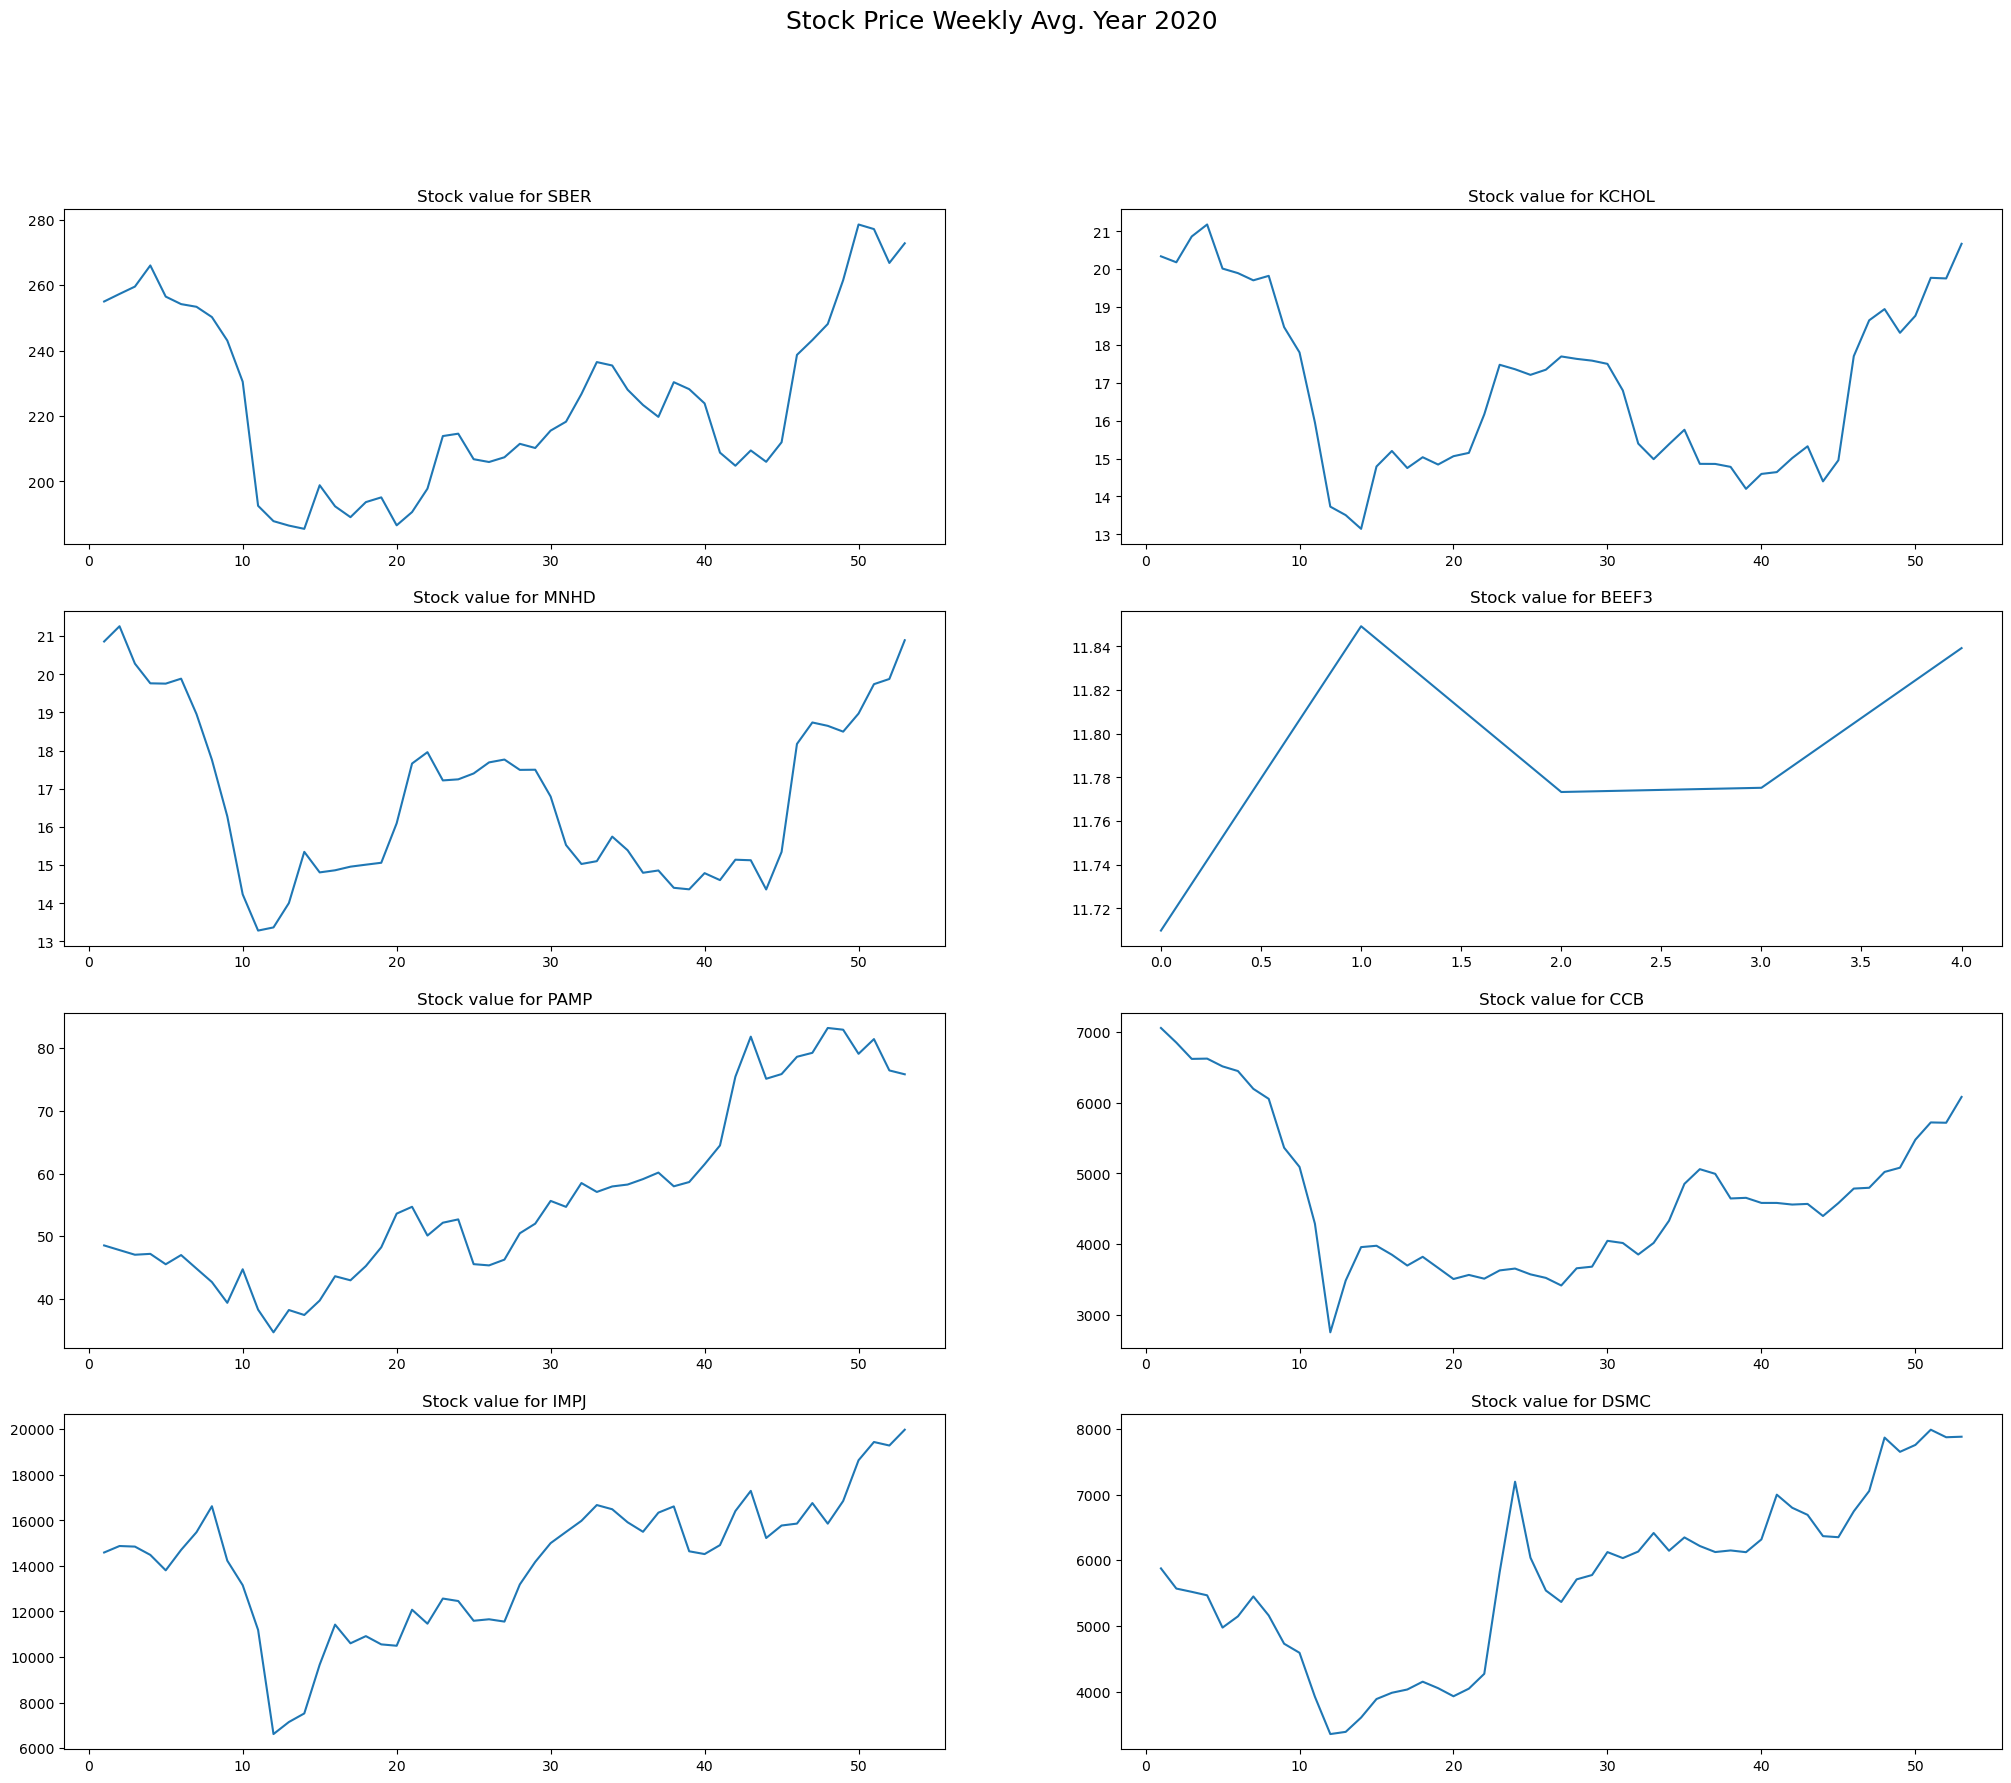

In [91]:
# Plot Mean stock Prices each week
fig,ax = plt.subplots(4,2,figsize=(25,20))
plt.suptitle("Stock Price Weekly Avg. Year 2020", fontsize=18)
ax[0,0].plot(df_sber_wplot)
ax[0,0].set_title("Stock value for SBER")
ax[0,1].plot(df_kchol_wplot)
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].plot(df_mnhd_wplot)
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].plot(df_beef3_wplot)
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].plot(df_pamp_wplot)
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].plot(df_ccb_wplot)
ax[2,1].set_title("Stock value for CCB")
ax[3,0].plot(df_impj_wplot)
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].plot(df_dsmc_wplot)
ax[3,1].set_title("Stock value for DSMC")

#### Stationarity test 

In [92]:
from statsmodels.tsa.stattools import adfuller

def test_adf(x):
    result = adfuller(x)
    print('ADF Statistic: %f' %result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")

In [93]:
print("Stationary test for SBER")
test_adf(df_sber_2020["Price"])
print("Stationary test for KCHOL")
test_adf(df_kchol_2020["Price"])
print("Stationary test for MNHD")
test_adf(df_mnhd_2020["Price"])
print("Stationary test for BEEF3")
test_adf(df_beef3_2020["Price"])
print("Stationary test for PAMP")
test_adf(df_pamp_2020["Price"])
print("Stationary test for CCB")
test_adf(df_ccb_2020["Price"])
print("Stationary test for IMPJ")
test_adf(df_impj_2020["Price"])
print("Stationary test for DSMC")
test_adf(df_dsmc_2020["Price"])




Stationary test for SBER
ADF Statistic: -2.009693
p-value: 0.282339
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for KCHOL
ADF Statistic: -1.666298
p-value: 0.448555
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for MNHD
ADF Statistic: -0.585817
p-value: 0.874155
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for BEEF3
ADF Statistic: -2.248392
p-value: 0.189153
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for PAMP
ADF Statistic: -1.590725
p-value: 0.488251
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for CCB
ADF Statistic: -0.641468
p-value: 0.861334
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for IMPJ
ADF Statistic: -2.103505
p-value: 0.243107
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for DSMC
ADF Statistic: -1.991824
p-value: 0.290169
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.572



The p-values are all > 0.05 , this shows a non-stationary

Determine the value of d ( differencing ) to make the data stationary

In [94]:
def determine_d(x):
    # x = df_mnhd_2020
    # x["Price"] = x["Price"].diff().replace(np.inf, np.nan)
    df_diff = x['Price'].diff()
    df_diff = df_diff.replace(np.inf, np.nan)
    df_diff.dropna(inplace=True)
    print("p-value before differncing" )
    test_adf(x["Price"])
    print("")
    print("p-value after differncing" )
    test_adf(df_diff)


In [95]:
determine_d(df_mnhd_2020)
# determine_d(df_sber_2020)
# determine_d(df_dsmc_2020)

p-value before differncing
ADF Statistic: -0.585817
p-value: 0.874155
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


p-value after differncing
ADF Statistic: -11.423716
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573



The value of d = 1 makes the data stationary 

In [96]:
# Show the Trends and Seasonlity
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonal(x):
    decompose = seasonal_decompose(x.Price, model='additive', extrapolate_trend='freq', period=120)
    decompose.plot().show()
    

There is no Seasonality as we looking at yearly data but there is trend for some of the datasets

#### Model development using Auto Arima

In [98]:
! pip install pmdarima

In [99]:
import pmdarima as pm

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()

In [101]:
# Model training function with exogenous data
def model_train_exo(x1,x2,df_future,diff):
    y_train=x1[["Price"]]
    # x_train=x1[['Month','Week','Day']]
    x_train=x1[['Day',]]
    y_test=x2[["Price"]]
    # x_test=x2[['Month','Week','Day']]
    x_test=x2[['Day']]
   
    # x_test['Date'] = x2['Date'].apply(lambda x: x.timestamp())
    # y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
    
    # y_train_scaled = scaler.fit_transform(y_train)
    y_train_scaled = y_train
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # x_train_df = pd.DataFrame(x_train_scaled, columns = x_train.columns)
    # x_test_df = pd.DataFrame(x_test_scaled, columns = x_test.columns)
    # x_train_scaled = x_train
    # x_test_scaled =  x_test
        # print(type(x_train_scaled))
    # print(x_train_scaled.shape)
    # print(type(y_train_scaled))
    # print(y_train_scaled.shape)

    
    model = pm.auto_arima(
        y_train_scaled, 
        X=x_train_scaled,
        start_p=1,
        max_p=10, 
        start_q=1,
        max_q=10, 
        d=diff,
        max_d=10,
        D=1,
        m=12,
        test='adf', 
        stepwise=True, 
        suppress_warnings=True, 
        error_action='warn', 
        seasonal=True, 
        random_state=42, 
        trace=True, 
        random=True,
        n_fits=50,) 
            
    len_train=len(x_train)
    model.fit_predict(y_train_scaled,X=x_train_scaled,n_periods=len_train)
    print(model.summary)
    y_train_pred =  model.fittedvalues()
  
   
    y_train_pred = y_train_pred.values.reshape(-1,1)
    
    print("MSE for training data")
    print(mean_squared_error(y_train,y_train_pred))
    print("")
    print("MAE for training data")
    mae = np.mean(np.abs(y_train - y_train_pred))
    print(mae)
    plt.figure(figsize=(10,10))
    plt.grid(True)
    plt.title("Training Actual vs Training Predicted")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.plot(x1[['Date']],y_train_pred,color='blue',label='Predicted')
    plt.plot(x1[['Date']],y_train,color='green',label='Actual')
    plt.legend()
    period=len(x_test)
    y_test_pred, conf_int = model.predict(X=x_test_scaled,n_periods=period,return_conf_int=True, alpha=0.05)
    y_test_pred = y_test_pred.values.reshape(-1,1)
    print("")
    print("MSE for test data")
    print(mean_squared_error(y_test,y_test_pred))
    print("")
    print("MAE for test data")
    mae = np.mean(np.abs(y_test - y_test_pred))
    print(mae)

    y_low = conf_int[:,0]
    y_low = scaler.inverse_transform(y_low.reshape(-1,1)).flatten()
    y_high = conf_int[:,1]
    y_high = scaler.inverse_transform(y_high.reshape(-1,1)).flatten()
    limit_low = pd.Series(y_low)
    limit_high = pd.Series(y_high)
    limit_low = limit_low.astype(float)
    limit_high = limit_high.astype(float)
    limit_low.replace([np.inf, -np.inf], np.nan, inplace=True)
    limit_high.replace([np.inf, -np.inf], np.nan, inplace=True)
    results = pd.DataFrame()
    results.index = x2["Date"]
       

    plt.figure(figsize=(10,10))
    plt.grid(True)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("Test vs Predicted")
    plt.plot(x2[['Date']],y_test_pred,color='red',label='Predicted')
    plt.plot(x2[['Date']],y_test,color='green',label='Future Observed')
    # plt.plot(x1[['Date']],y_train,color='blue',label='Past')
    plt.fill_between(results.index, limit_low, limit_high, color='k', alpha=0.1)
    plt.legend()
    
    dff_future=df_future[['Day']]
    dff_future_scaled = scaler.transform(dff_future)
    y_future = model.predict(X=dff_future_scaled,n_periods=30)
    y_future = y_future.values.reshape(-1,1)  # no values
    # y_future = scaler.inverse_transform(y_future.values.reshape(30,1))
    
    plt.figure(figsize=(10,10))
    plt.title("Future Observed vs Forecasted")
    plt.grid(True)
    plt.plot(x2[['Date']],y_test,color='green',label='Future Observed')
    plt.plot(dff[['Date']],y_future,color='blue',label='Forecasted')
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    return model

In [105]:
# Construct a dataframe with dates for future prediction 
from datetime import datetime

date_range = pd.date_range(start='2021-04-01', end='2021-04-30')
dff = pd.DataFrame(date_range, columns=['Date'])
dff.head()
dff['Price'] = 'NaN'
dff.head()

dff["Month"]=dff["Date"].apply(get_month)
dff["Year"]=dff["Date"].apply(get_year)
dff["Day"]=dff["Date"].apply(get_dayofweek)
dff["Week"]=dff["Date"].apply(get_week)
dff.head()

Date Price  Month  Year  Day  Week
0 2021-04-01   NaN      4  2021    3    13
1 2021-04-02   NaN      4  2021    4    13
2 2021-04-03   NaN      4  2021    5    13
3 2021-04-04   NaN      4  2021    6    13
4 2021-04-05   NaN      4  2021    0    14

#### Forecast for SBER

Seasonal decompose SBER


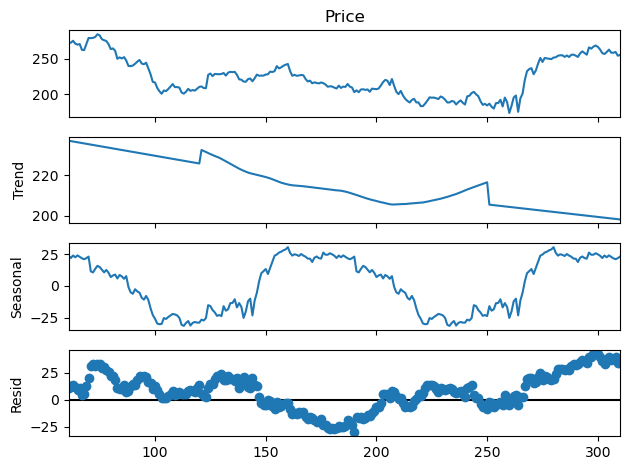

In [106]:
print("Seasonal decompose SBER")
seasonal(df_sber_2020)

<b>Model training and prediction with exogenous values</b>

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1570.900, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1506.388, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1572.791, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1500.460, Time=1.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1499.785, Time=1.03 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1505.756, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1500.358, Time=0.94 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1502.610, Time=2.43 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1501.7

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

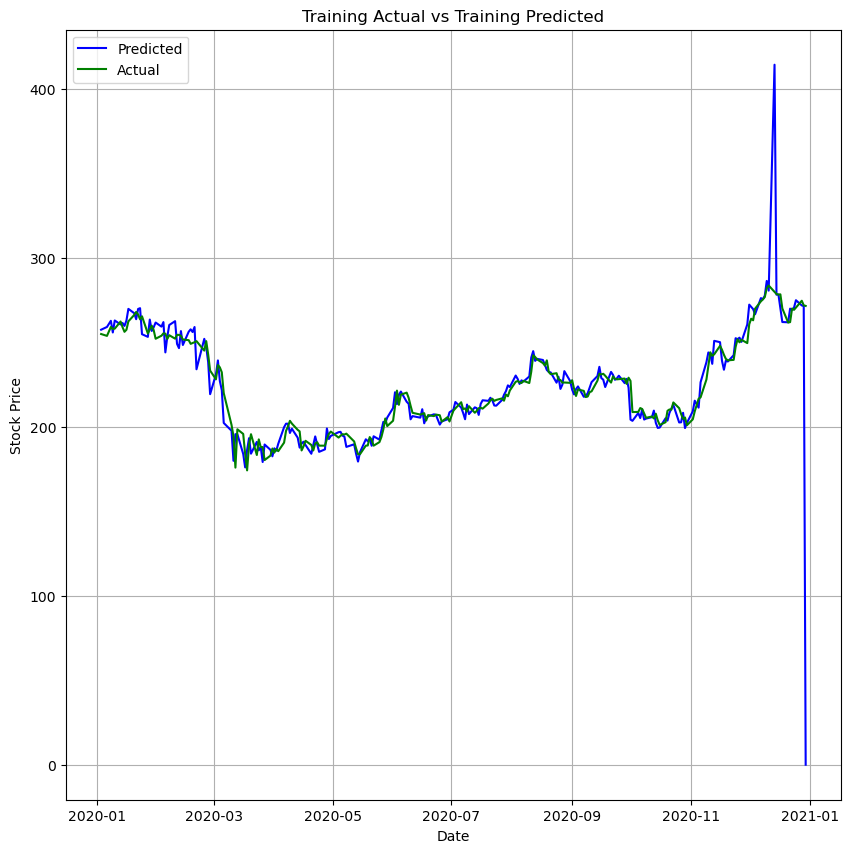

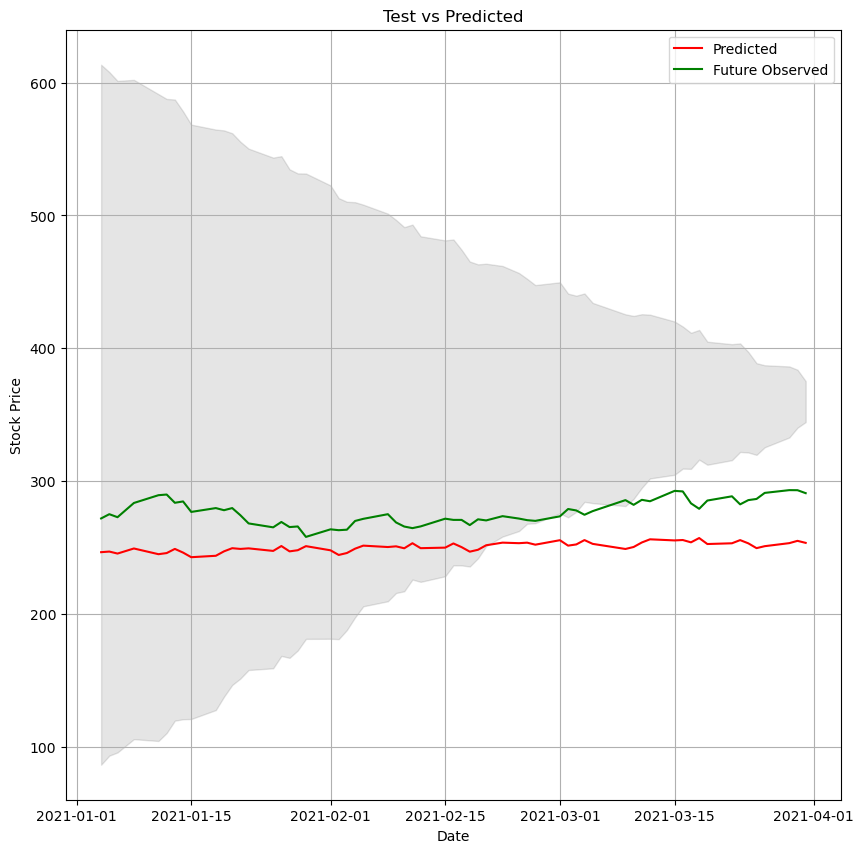

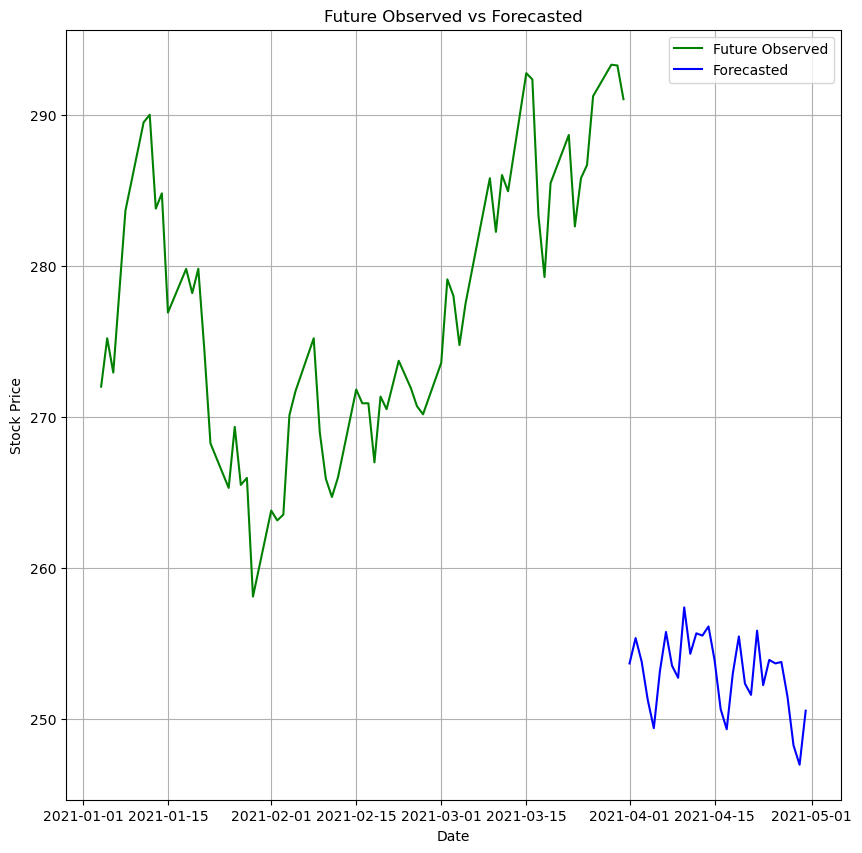

In [107]:
warnings.filterwarnings("ignore")
model_train_exo(df_sber_2020,df_sber_2021,dff,1)

#### Forecast for KCHOL

Seasonal decompose KCHOL


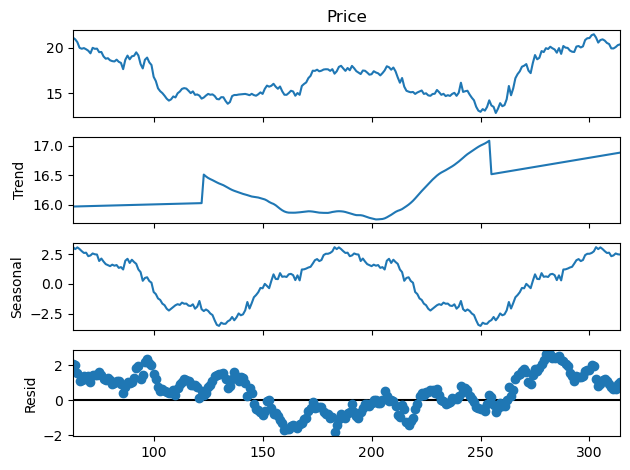

In [110]:
print("Seasonal decompose KCHOL")
seasonal(df_kchol_2020)

<b>Model training with exogenous data</b>

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=541.937, Time=0.15 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=432.014, Time=0.34 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=285.023, Time=0.64 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=286.935, Time=1.80 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=286.917, Time=3.08 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=288.536, Time=4.77 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=431.423, Time=0.55 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=370.829, Time=0.67 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=288.929, Time=1.41 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, Time=

ARIMA(order=(0, 2, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

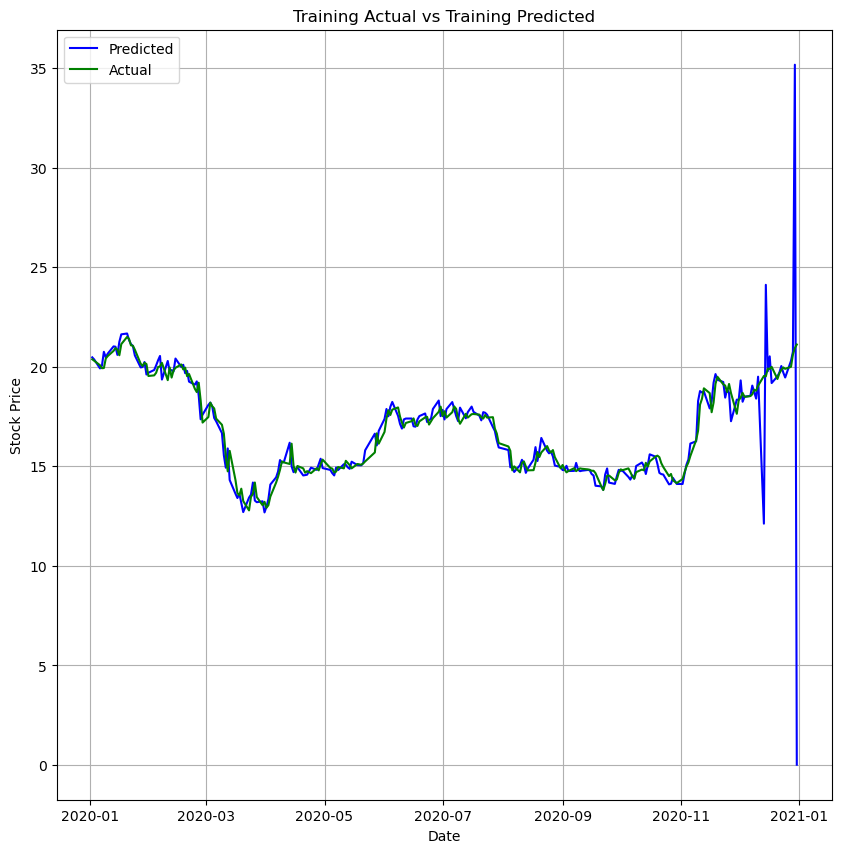

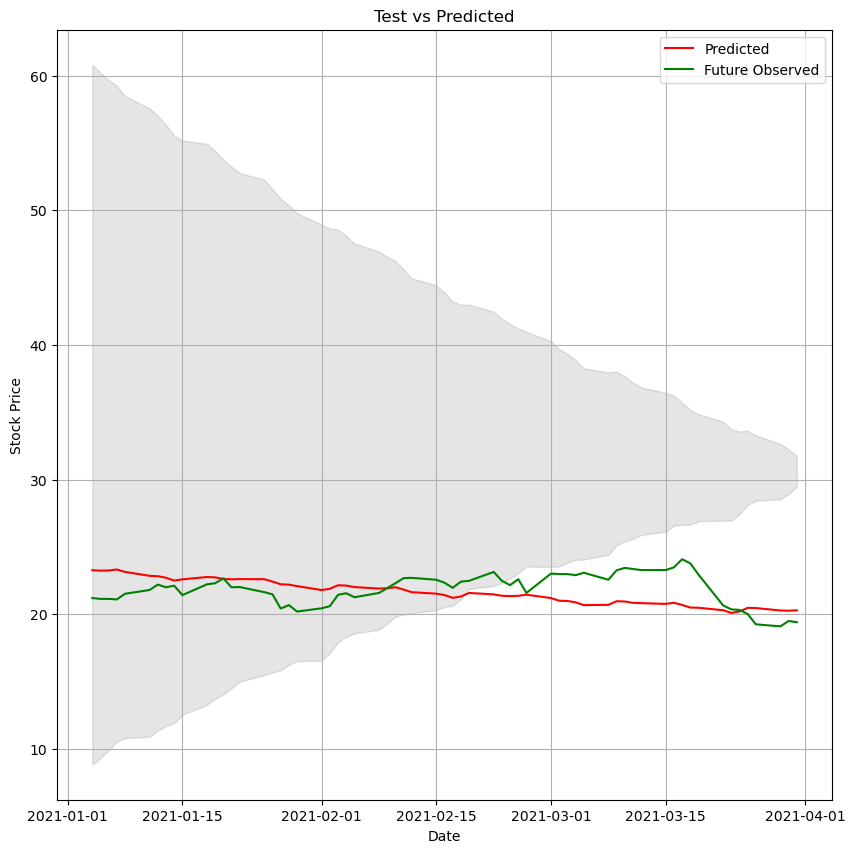

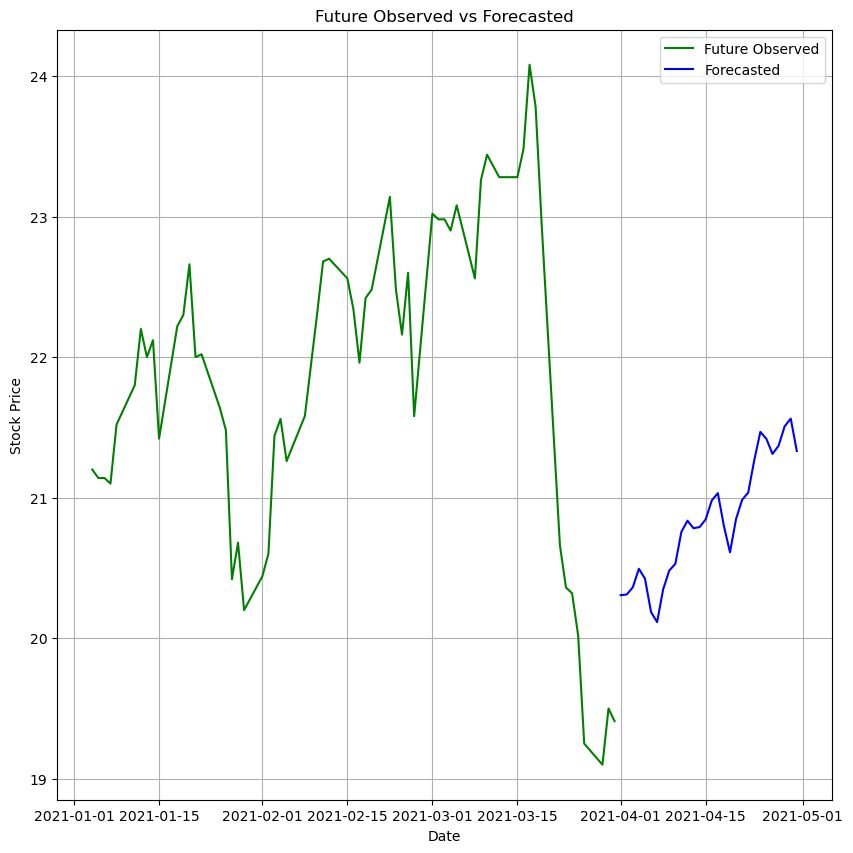

In [111]:
warnings.filterwarnings("ignore")
model_train_exo(df_kchol_2020,df_kchol_2021,dff,2)

#### Forecast for MNHD

Seasonal decompose MNHD


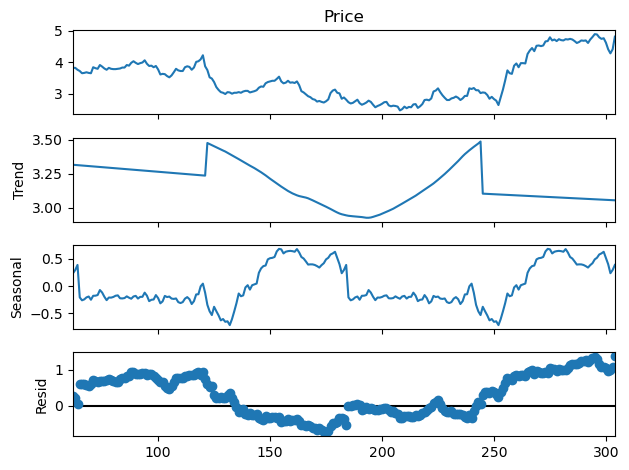

In [113]:
print("Seasonal decompose MNHD")
seasonal(df_mnhd_2020)

<b>Model training with exogenous data</b>


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-407.152, Time=2.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-271.240, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-351.566, Time=0.79 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-408.324, Time=1.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-286.286, Time=0.63 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-408.596, Time=1.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-352.092, Time=0.90 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-407.341, Time=4.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-407.608, Time=4.46 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-408.962, Time=4.26 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-395.979, Time=2.33 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-407.516, Time=4.79 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=-407.502, Time=4.66 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-409.437, Time=3.08 sec
 ARIMA(1,1,0)(0,1,1

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

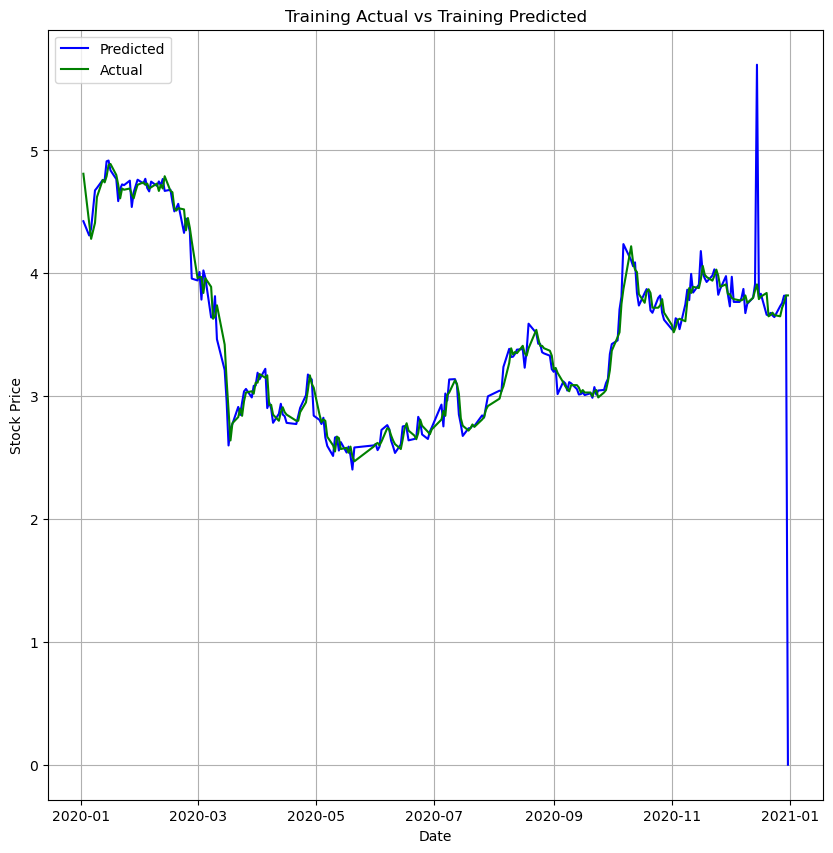

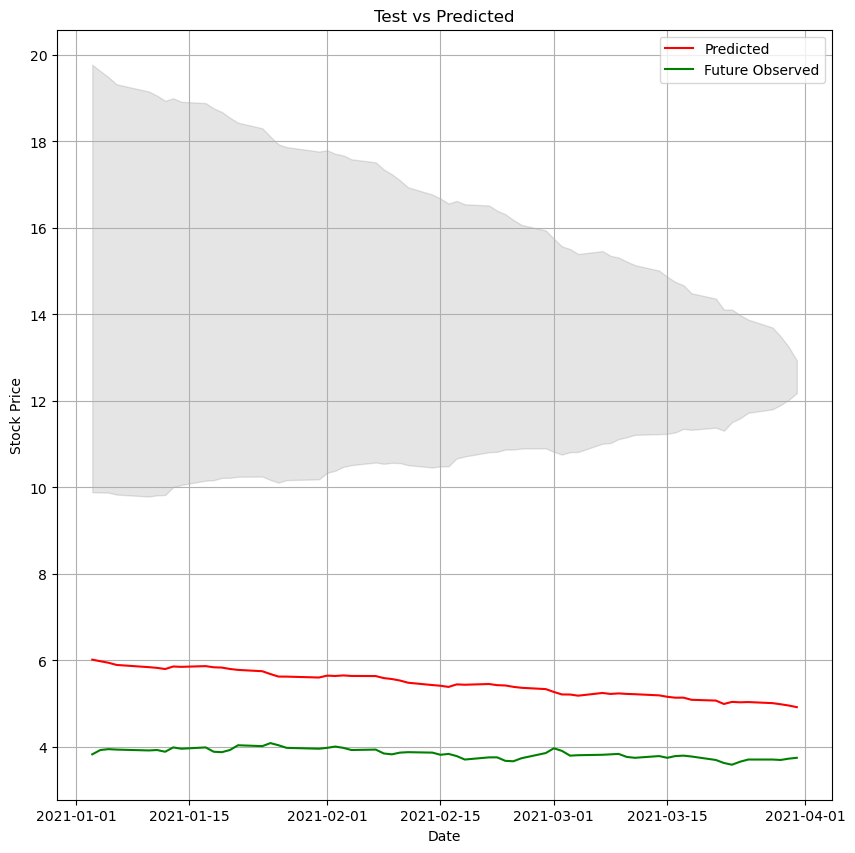

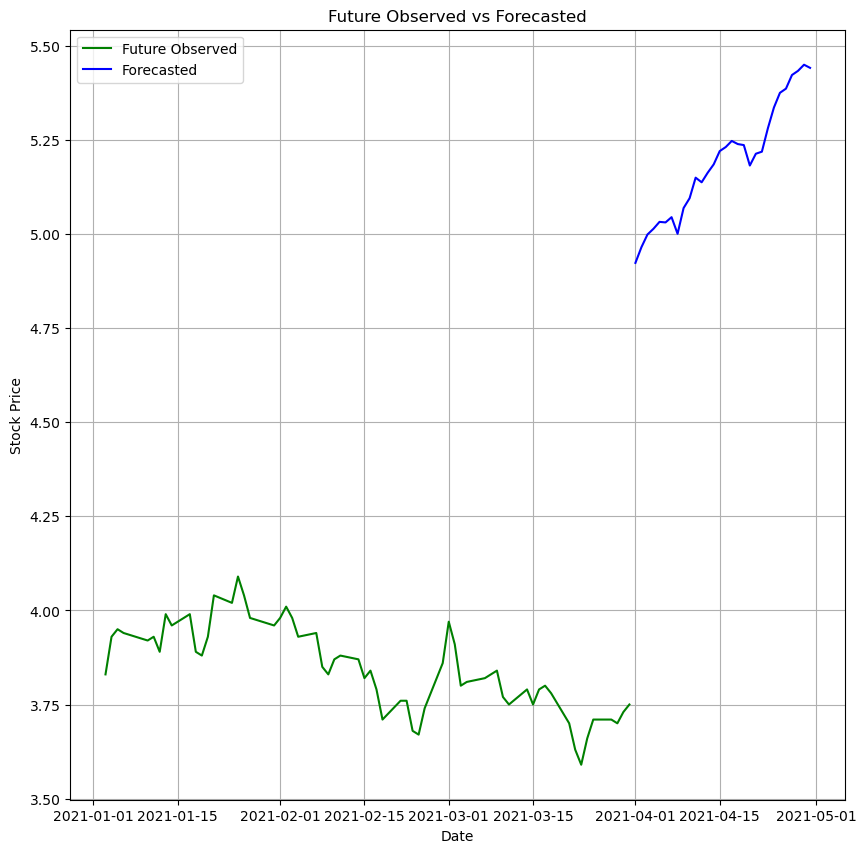

In [114]:
warnings.filterwarnings("ignore")
model_train_exo(df_mnhd_2020,df_mnhd_2021,dff,1)

#### Forecast for BEEF3

Seasonal decompose BEEF3


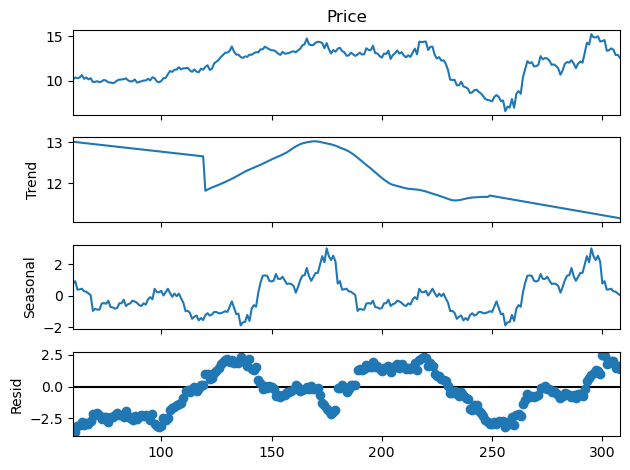

In [116]:
print("Seasonal decompose BEEF3")
seasonal(df_beef3_2020)

<b>Model training with exogenous data</b>

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=443.461, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=362.139, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=444.466, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=339.941, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=338.425, Time=1.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=363.259, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.64 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=340.068, Time=1.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=339.578, Time=2.68 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=340.419, Time=

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

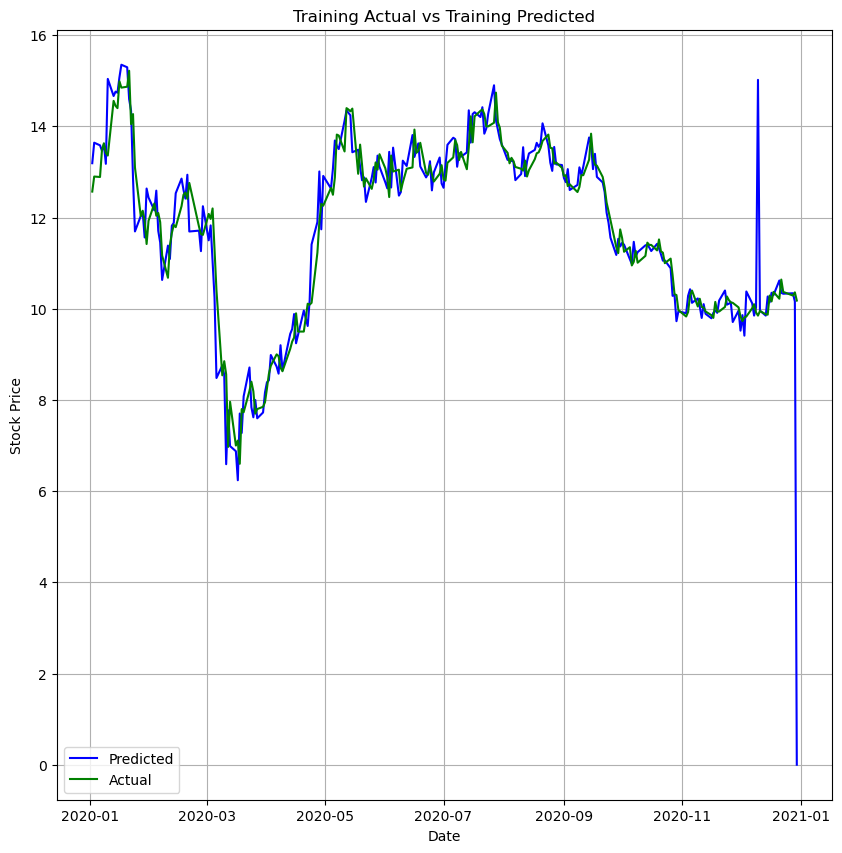

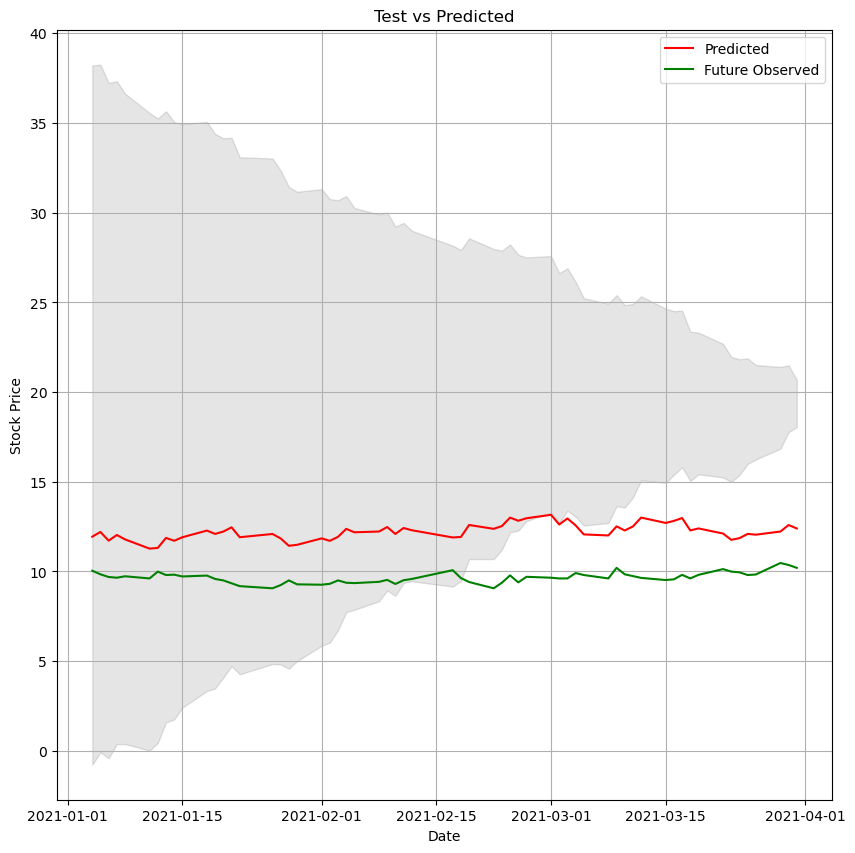

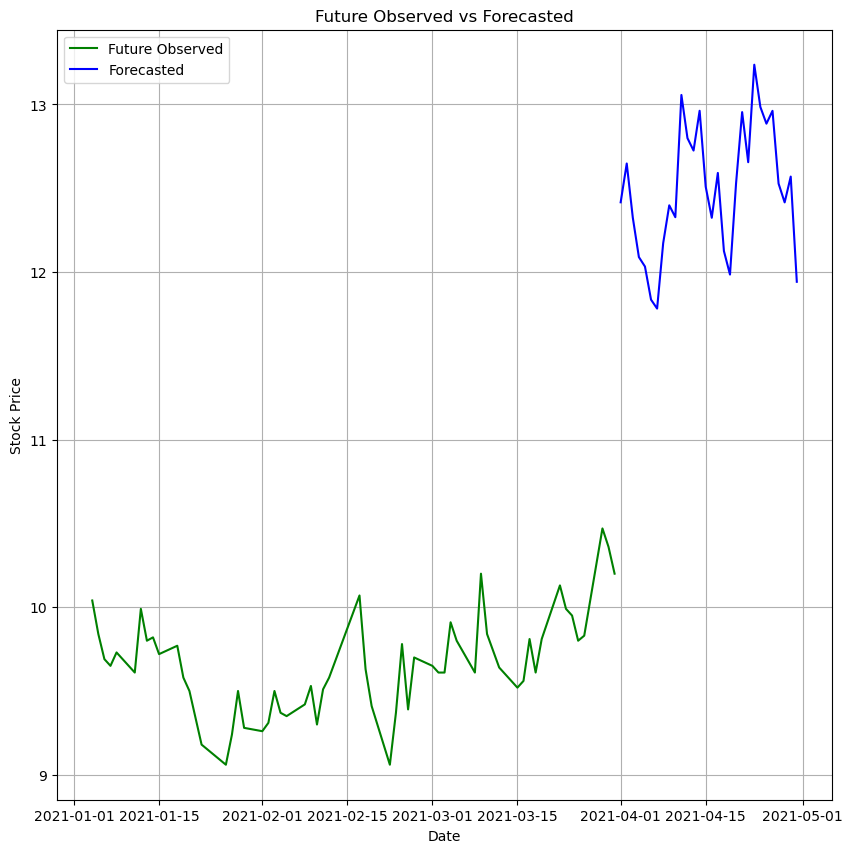

In [117]:
warnings.filterwarnings("ignore")
model_train_exo(df_beef3_2020,df_beef3_2021,dff,1)

#### Forecast for PAMP

Seasonal decompose PAMP


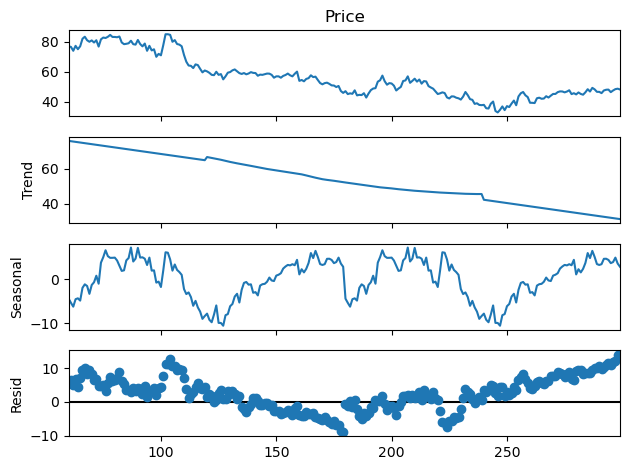

In [119]:
print("Seasonal decompose PAMP")
seasonal(df_pamp_2020)


<b>Model training with exogenous data</b>

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1313.929, Time=0.27 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1155.889, Time=0.42 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1191.288, Time=0.19 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=1135.279, Time=1.07 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=1100.435, Time=2.27 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(1,2,0)(2,1,2)[12]             : AIC=1101.708, Time=3.94 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,2,0)(2,1,1)[12]             : AIC=inf, Time=3.94 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=1088.472, Time=2.06 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=1122.608, Time=1.32 sec
 ARIMA(2,2,0)(2,1,2)[12]             : AIC=1089.9

ARIMA(order=(8, 2, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

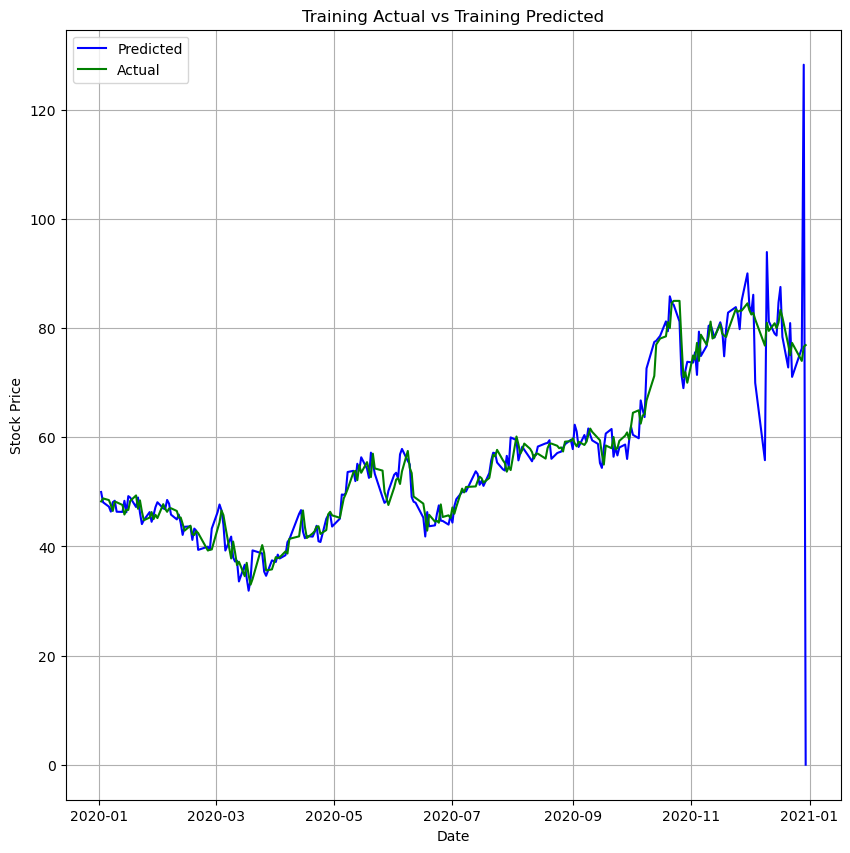

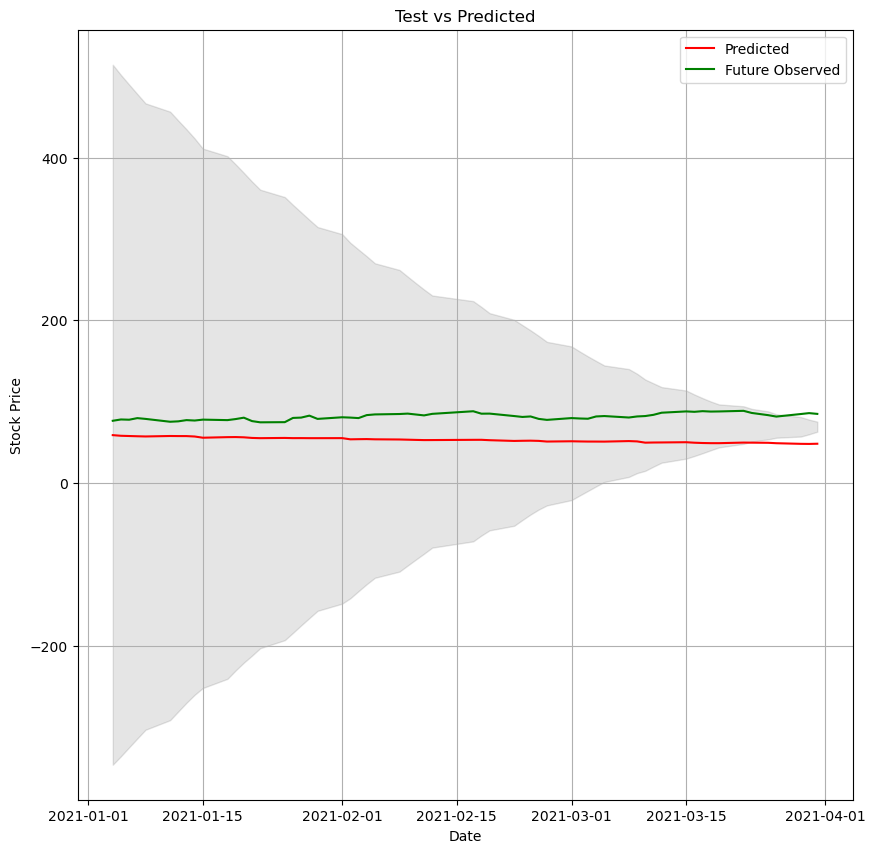

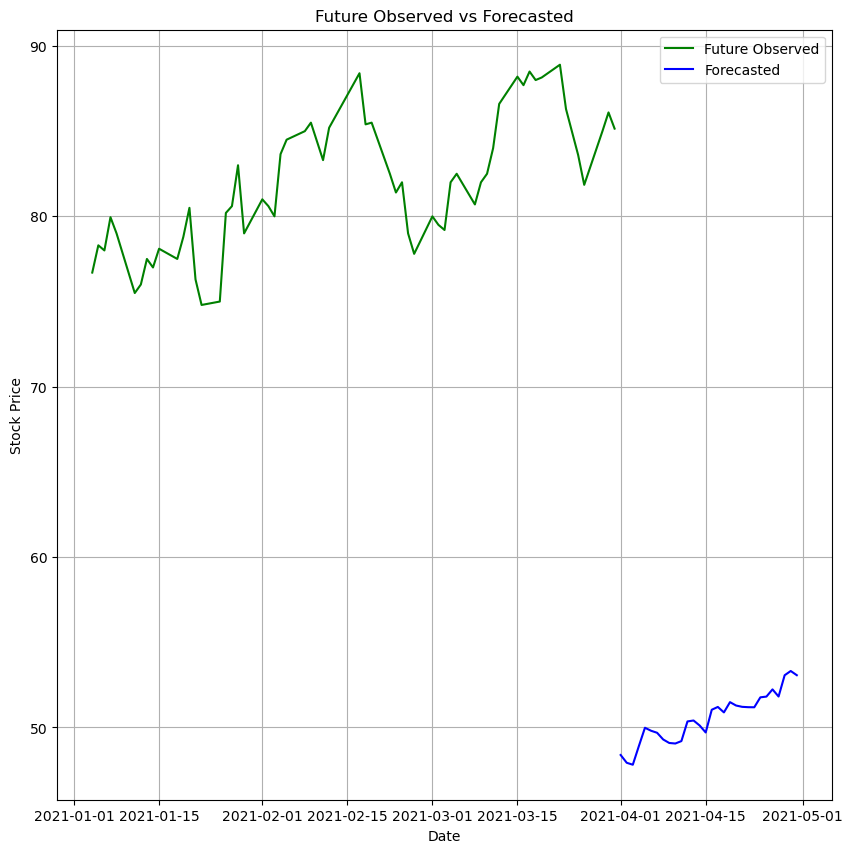

In [120]:
warnings.filterwarnings("ignore")
model_train_exo(df_pamp_2020,df_pamp_2021,dff,2)

#### Forecast for CCB

Seasonal decompose CCB


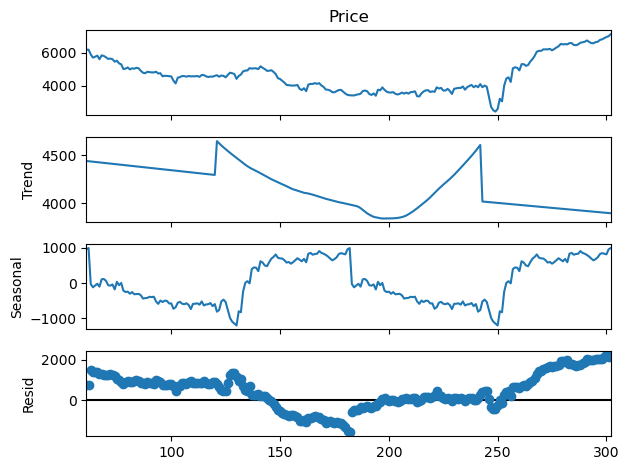

In [122]:
print("Seasonal decompose CCB")
seasonal(df_ccb_2020)

<b>Model training with exogenous data</b>

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3136.166, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3083.003, Time=0.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3137.613, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3064.676, Time=3.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.89 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3062.935, Time=2.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3081.458, Time=0.80 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3064.717, Time=3.16 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3064.167, Time=5.74 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3064.5

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

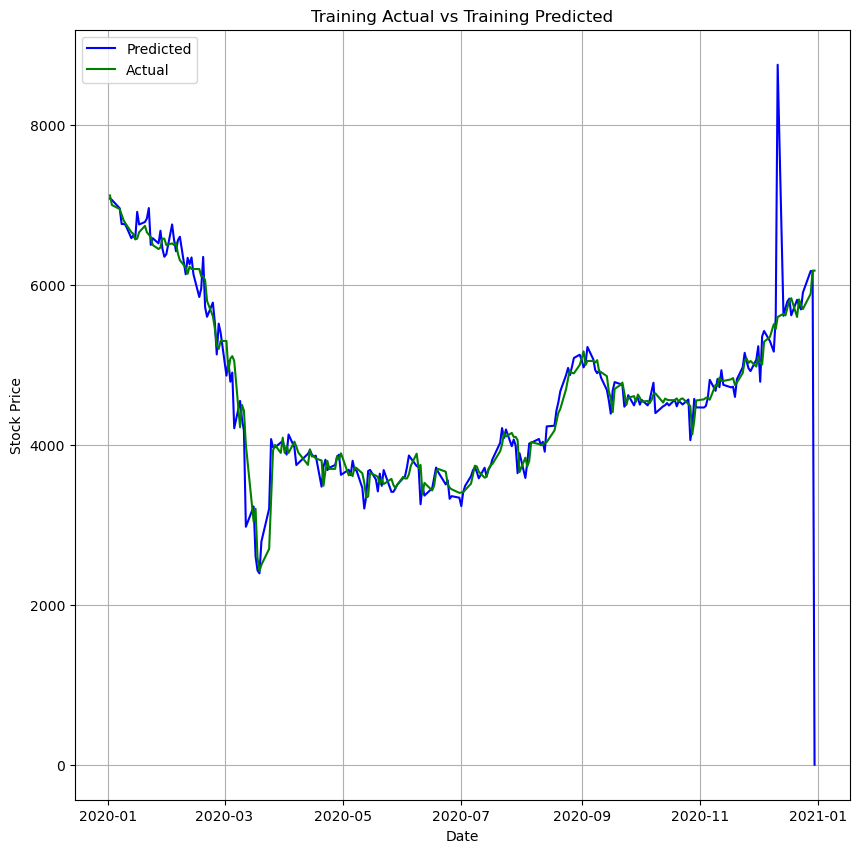

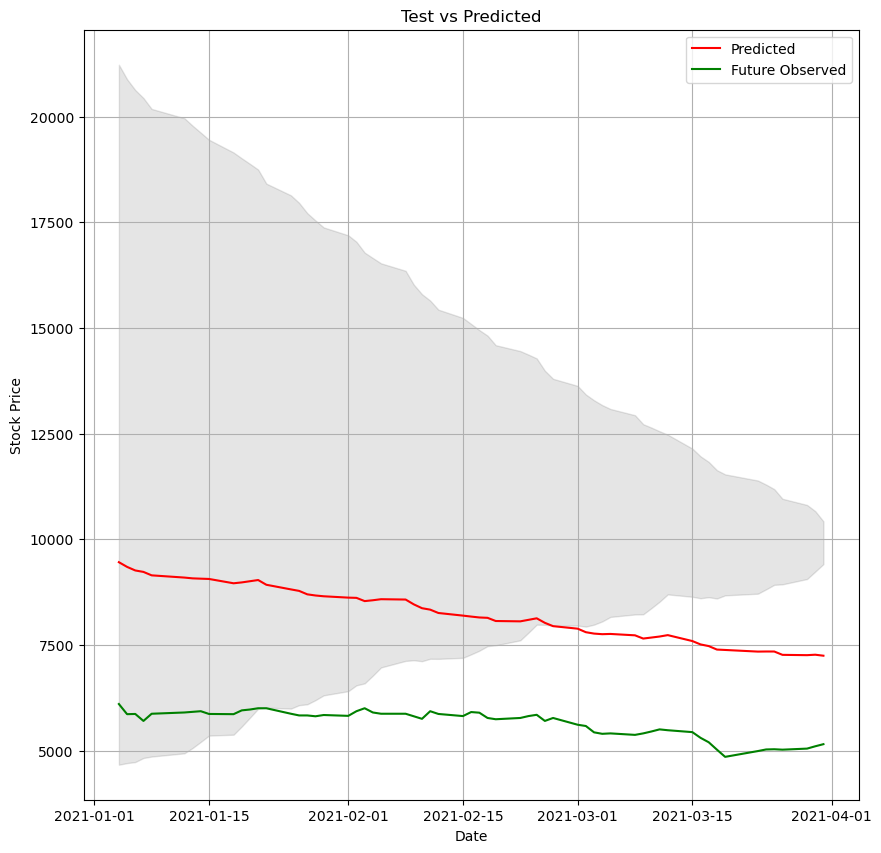

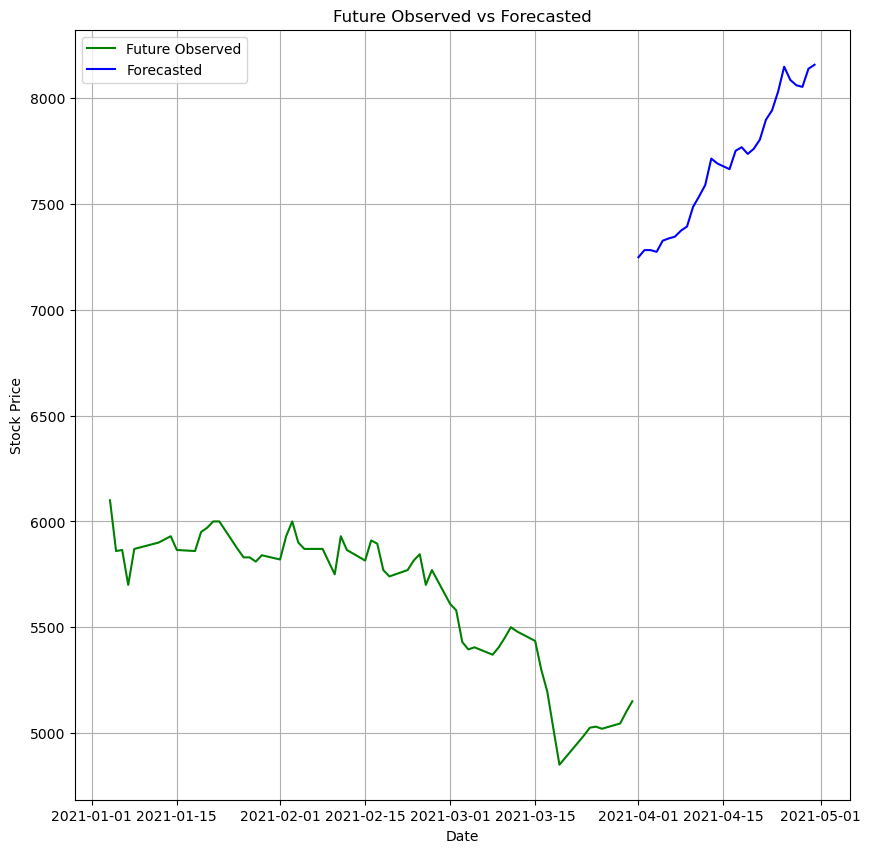

In [123]:
warnings.filterwarnings("ignore")
model_train_exo(df_ccb_2020,df_ccb_2021,dff,1)

#### Forecast for IMPJ

Seasonal decompose IMPJ


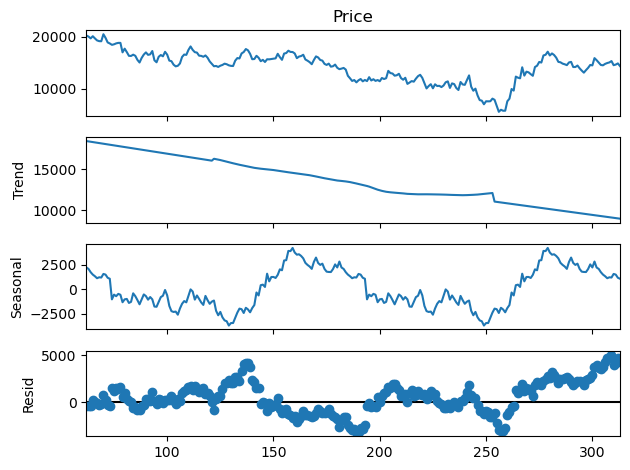

In [125]:
print("Seasonal decompose IMPJ")
seasonal(df_impj_2020)

<p>Model training with exogenous data</p>

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=4097.174, Time=0.28 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=4012.914, Time=1.54 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=4040.016, Time=0.11 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=3978.623, Time=2.13 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=8.74 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=4039.217, Time=4.44 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=3936.542, Time=4.52 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=3967.888, Time=0.63 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=8.23 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=3921.588, Time=6.34 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=3957.0

ARIMA(order=(4, 2, 1), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

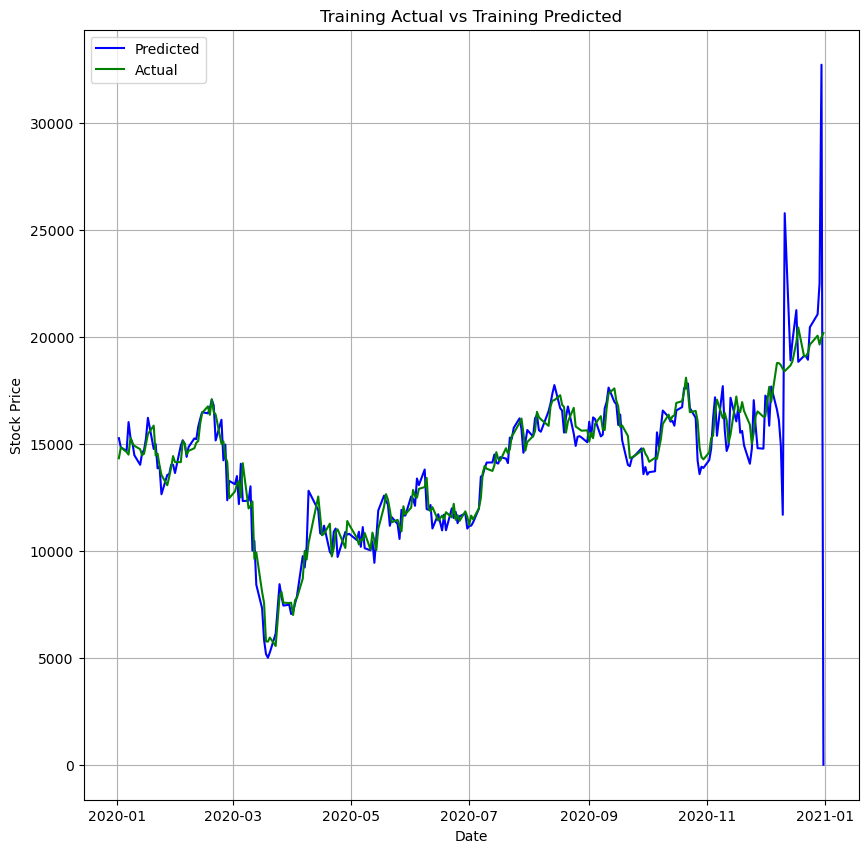

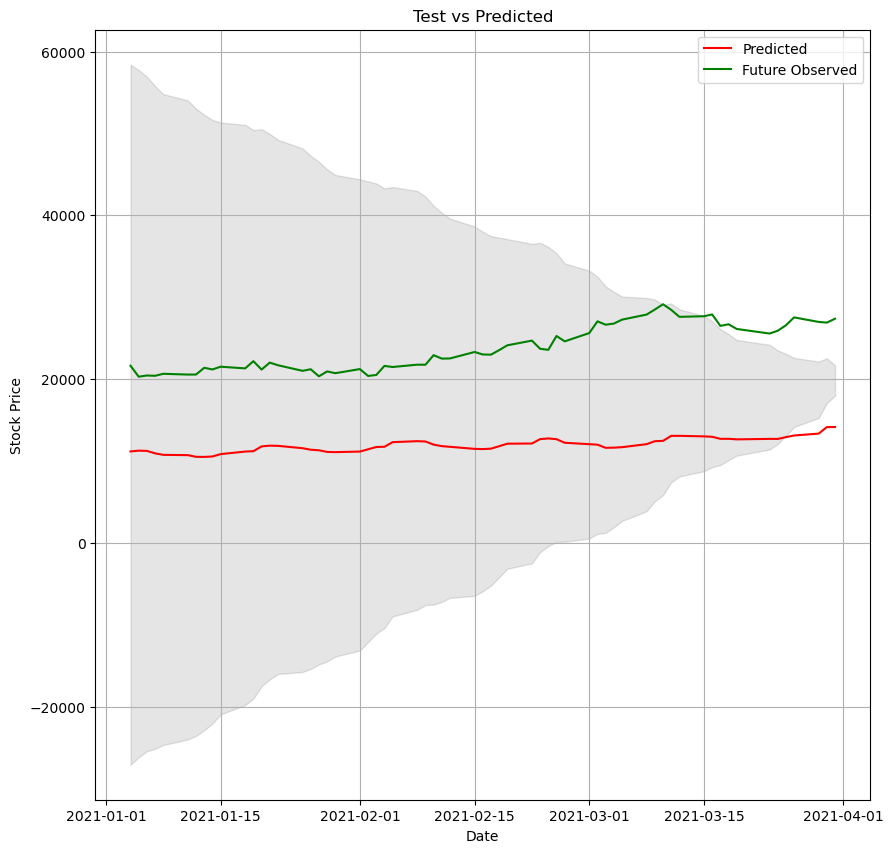

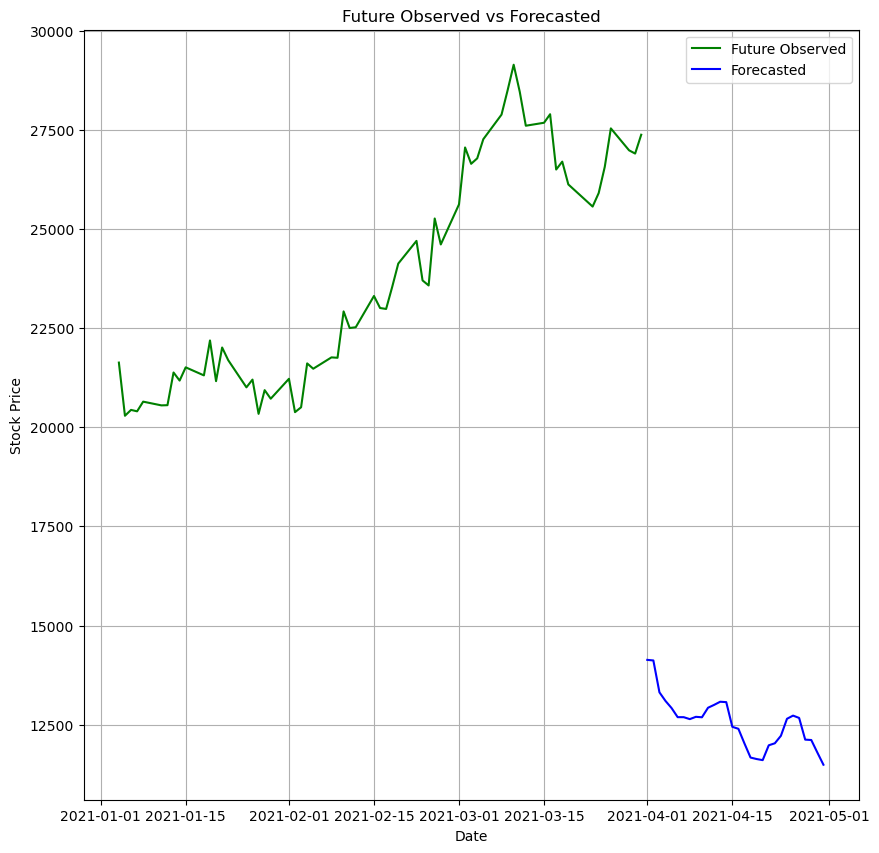

In [126]:
warnings.filterwarnings("ignore")
model_train_exo(df_impj_2020,df_impj_2021,dff,2)

#### Forecast for DSMC

Seasonal decompose DSMC


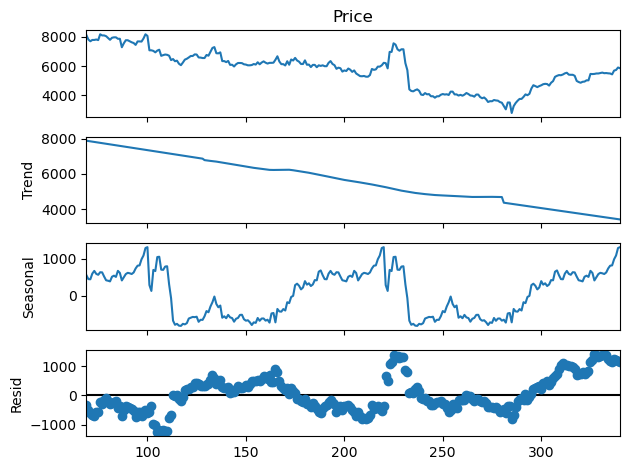

In [128]:
print("Seasonal decompose DSMC")
seasonal(df_dsmc_2020)

<b>Model training with exogenous data</b>

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3698.776, Time=0.35 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3628.111, Time=0.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3700.775, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3600.228, Time=2.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3598.205, Time=1.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3626.229, Time=0.61 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3600.228, Time=2.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=6.12 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3600.126, T

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

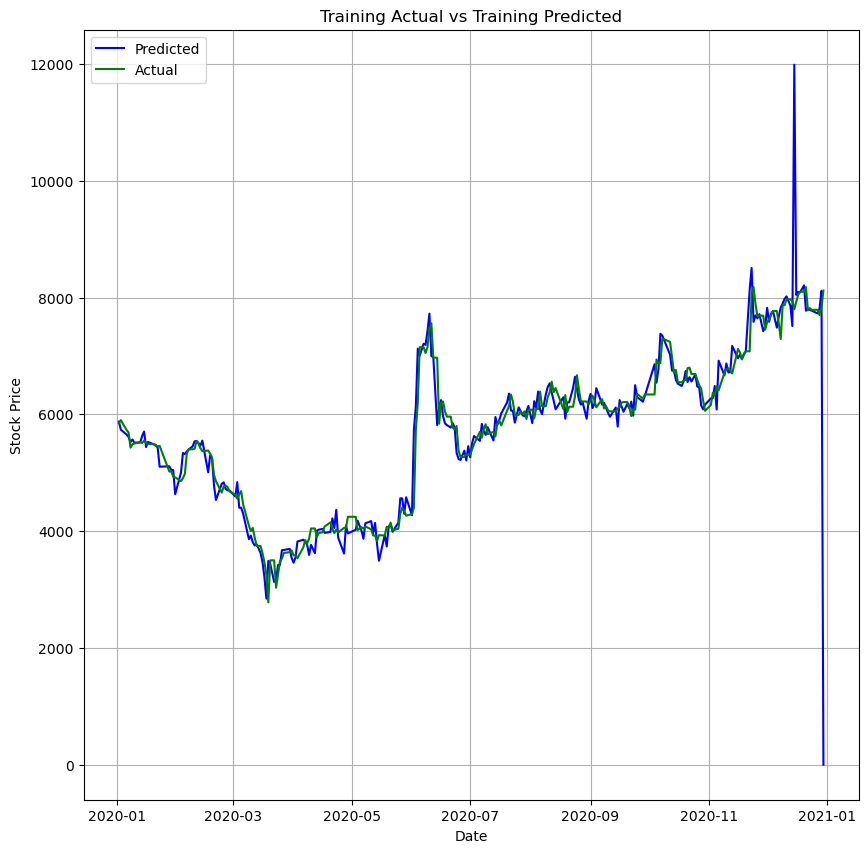

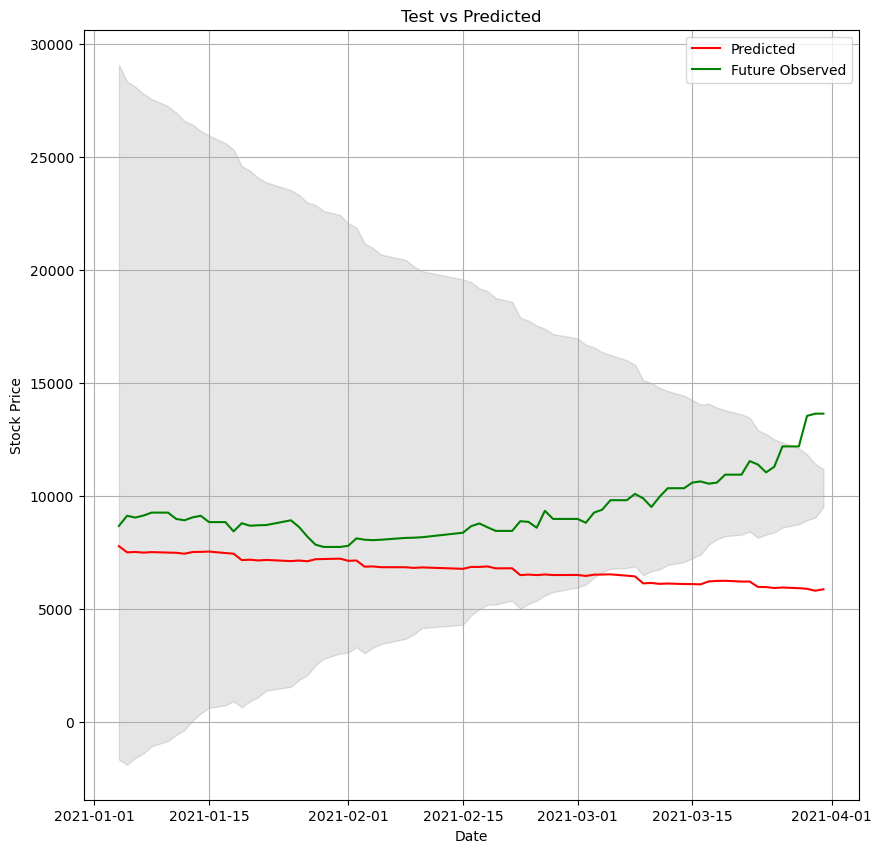

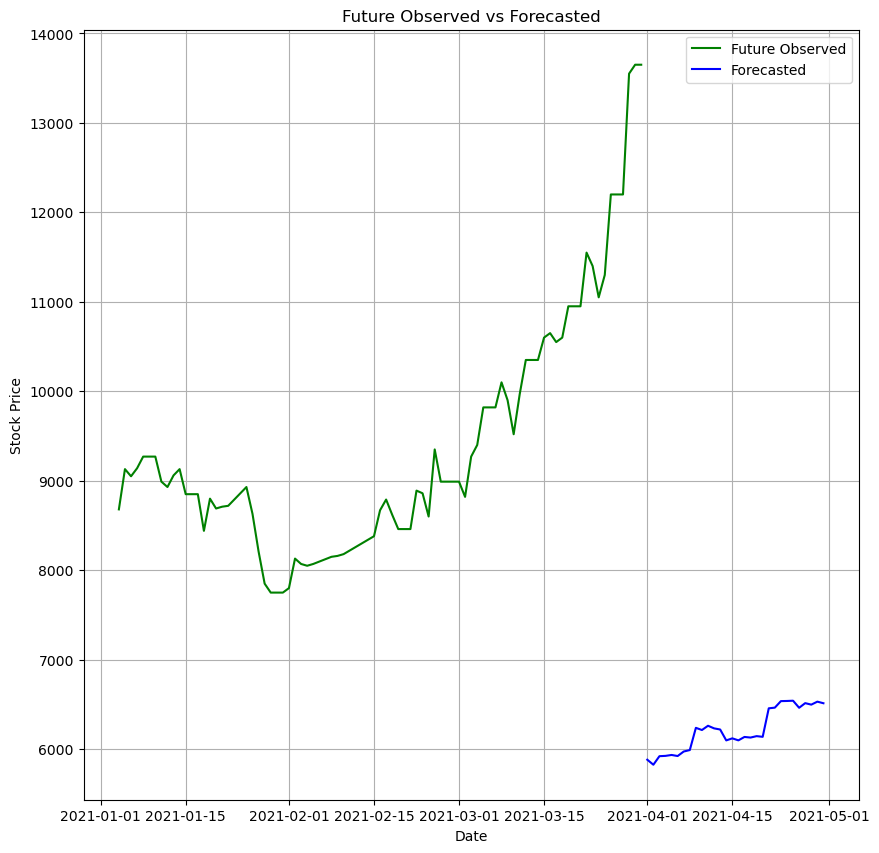

In [129]:
warnings.filterwarnings("ignore")
model_train_exo(df_dsmc_2020,df_dsmc_2021,dff,1)

#### Time Series Forecasting using Prophet

In [87]:
pip install pystan==2.19.1.1 prophet

Note: you may need to restart the kernel to use updated packages.


In [88]:
from prophet import Prophet

In [130]:
# # Python
# lockdowns = pd.DataFrame([
#     {'holiday': 'lockdown_1', 'ds': '2020-03-01', 'lower_window': 0, 'ds_upper': '2020-05-30'},
#     {'holiday': 'lockdown_2', 'ds': '2020-06-01', 'lower_window': 0, 'ds_upper': '2020-07-30'},
#     # {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
#     # {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
# ])
# for t_col in ['ds', 'ds_upper']:
#     lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
# lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
# lockdowns

In [131]:
def prophet_forecast(xtrain,xtest):
    xtrain_f=xtrain[["Date","Price"]]
    xtrain_f=xtrain_f.rename(columns = {"Date":"ds"})
    xtrain_f=xtrain_f.rename(columns = {"Price":"y"})
    model = Prophet()
    model.fit(xtrain_f)
    period=len(xtest)
    df_future = model.make_future_dataframe(periods=90, freq='D')
    forecast_prophet = model.predict(df_future)
    forecast_plot =model.plot(forecast_prophet)
    plt.plot(xtest['Date'], xtest['Price'],'ro', markersize=3, label='Test Data')
    plt.legend()
    model.plot_components(forecast_prophet)
    return forecast_prophet

#### Forescast for share SBER

15:00:30 - cmdstanpy - INFO - Chain [1] start processing
15:00:30 - cmdstanpy - INFO - Chain [1] done processing


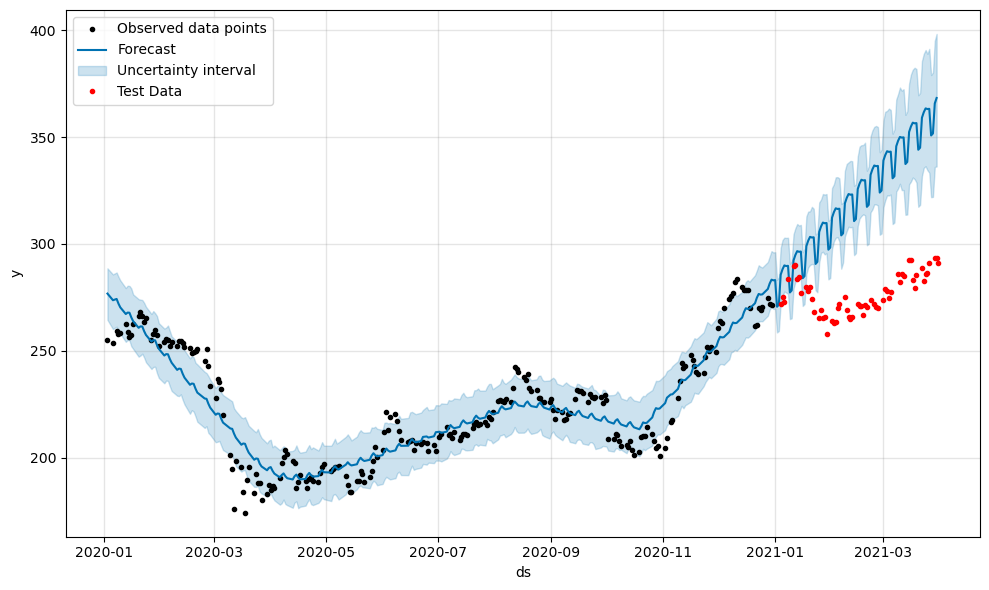

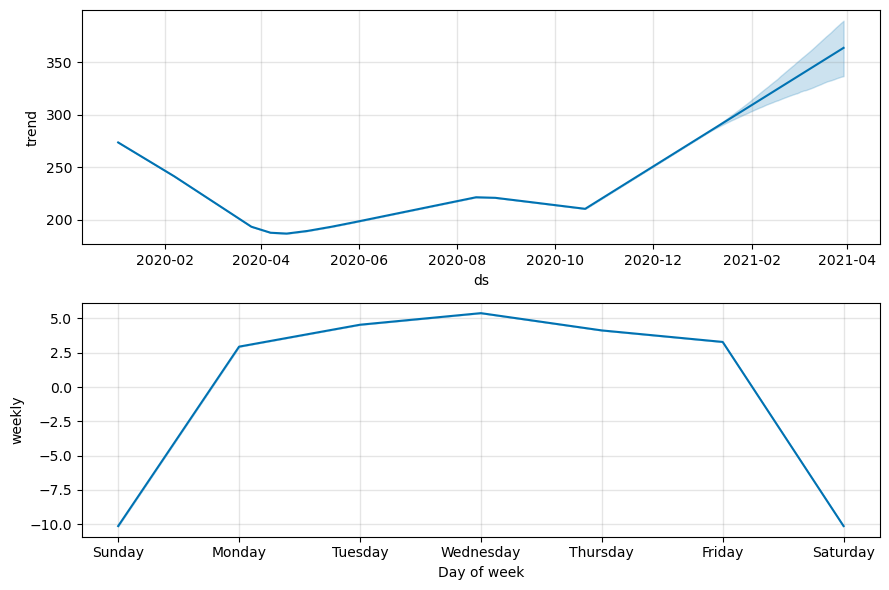

In [132]:
forecast_sber=prophet_forecast(df_sber_2020,df_sber_2021)

#### Forecast for KCHOL

15:00:32 - cmdstanpy - INFO - Chain [1] start processing
15:00:32 - cmdstanpy - INFO - Chain [1] done processing


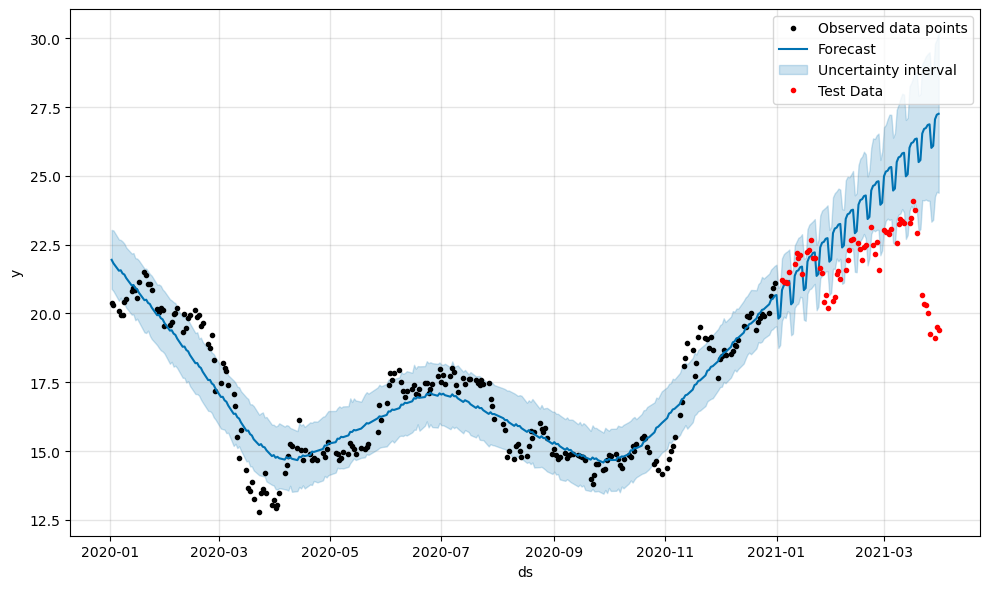

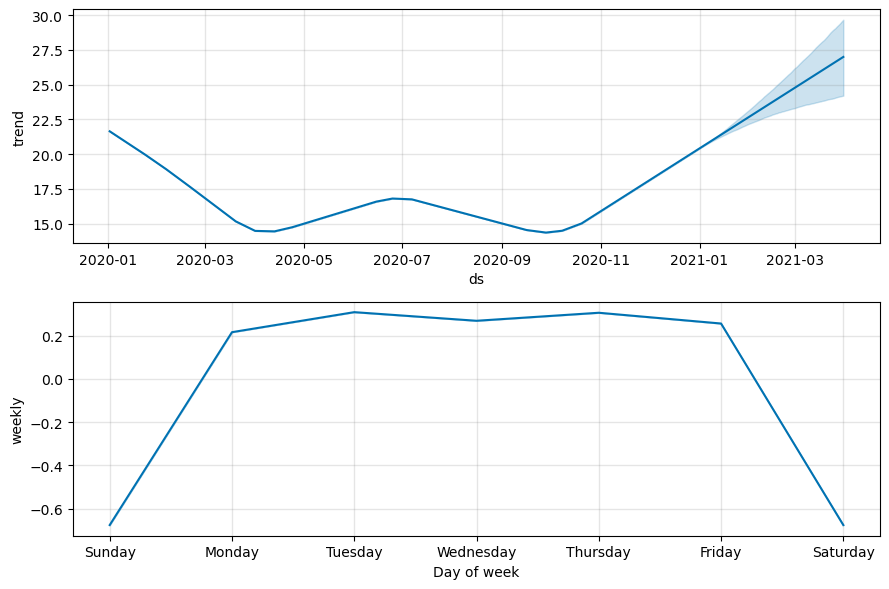

In [133]:
forecast_kchol=prophet_forecast(df_kchol_2020,df_kchol_2021)


#### Forecast for MNHD

16:13:15 - cmdstanpy - INFO - Chain [1] start processing
16:13:15 - cmdstanpy - INFO - Chain [1] done processing


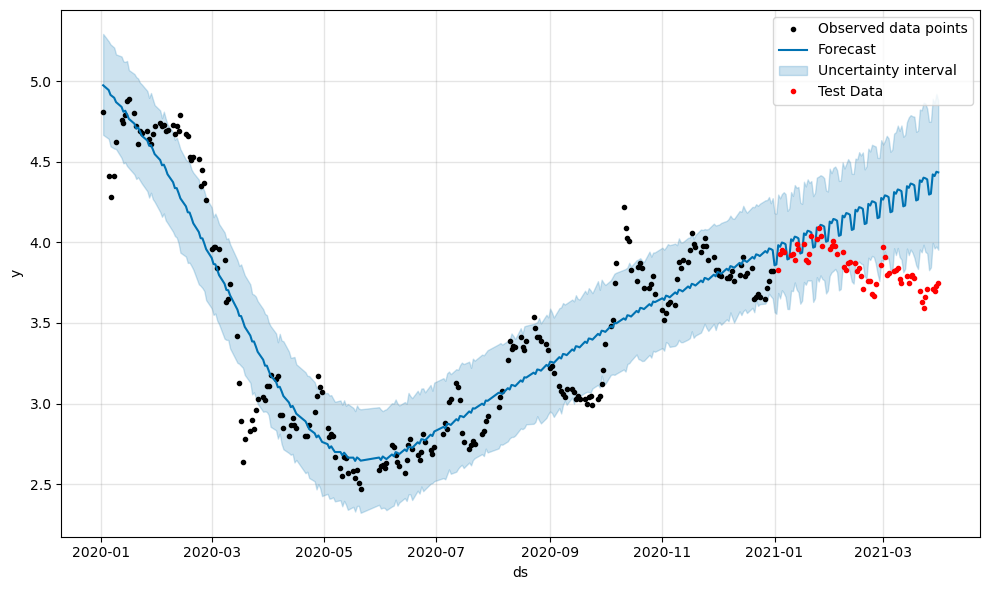

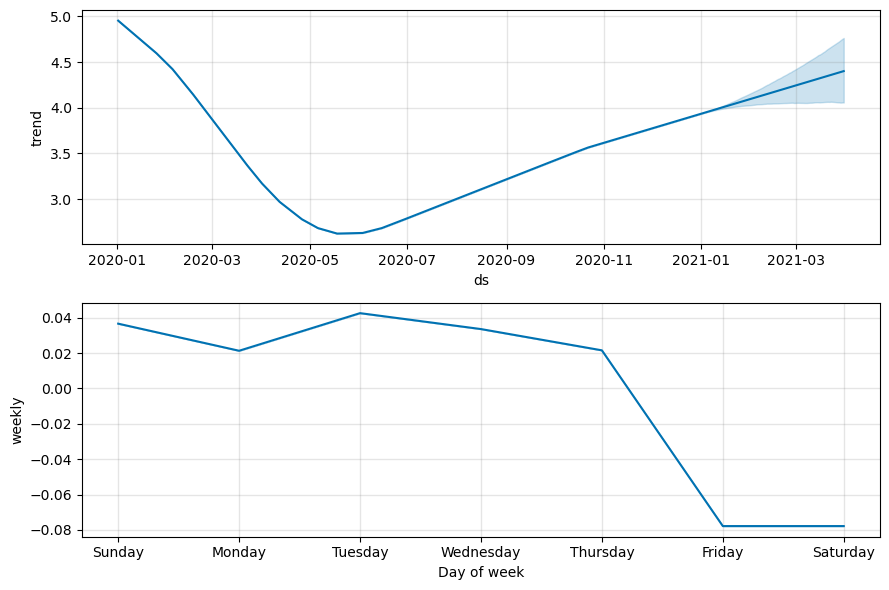

In [92]:
forecast_mnhd=prophet_forecast(df_mnhd_2020,df_mnhd_2021)

#### Forecast for BEEF3

16:13:16 - cmdstanpy - INFO - Chain [1] start processing
16:13:16 - cmdstanpy - INFO - Chain [1] done processing


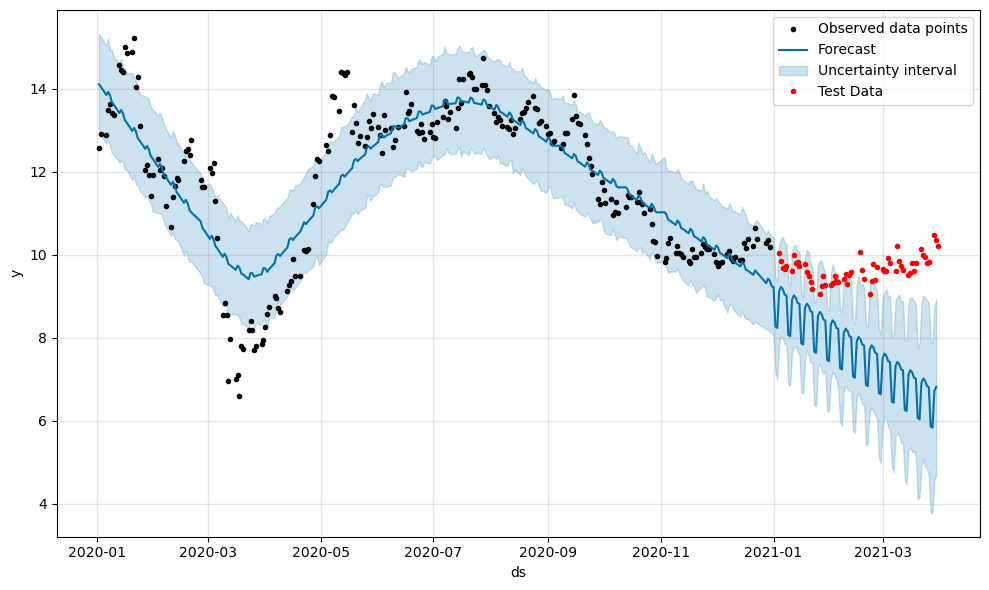

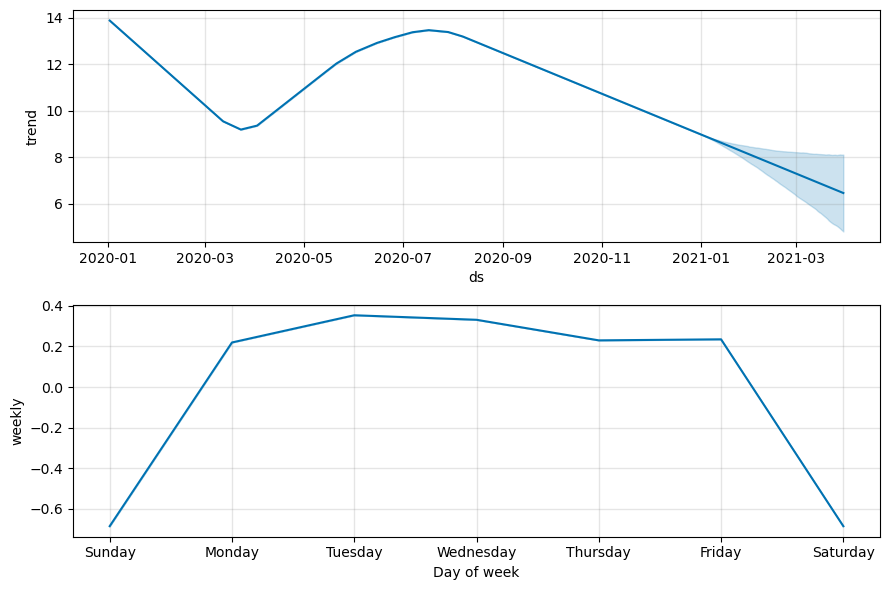

In [93]:
forecast_beef3=prophet_forecast(df_beef3_2020,df_beef3_2021)

#### Forecast for PAMP

16:13:17 - cmdstanpy - INFO - Chain [1] start processing
16:13:17 - cmdstanpy - INFO - Chain [1] done processing


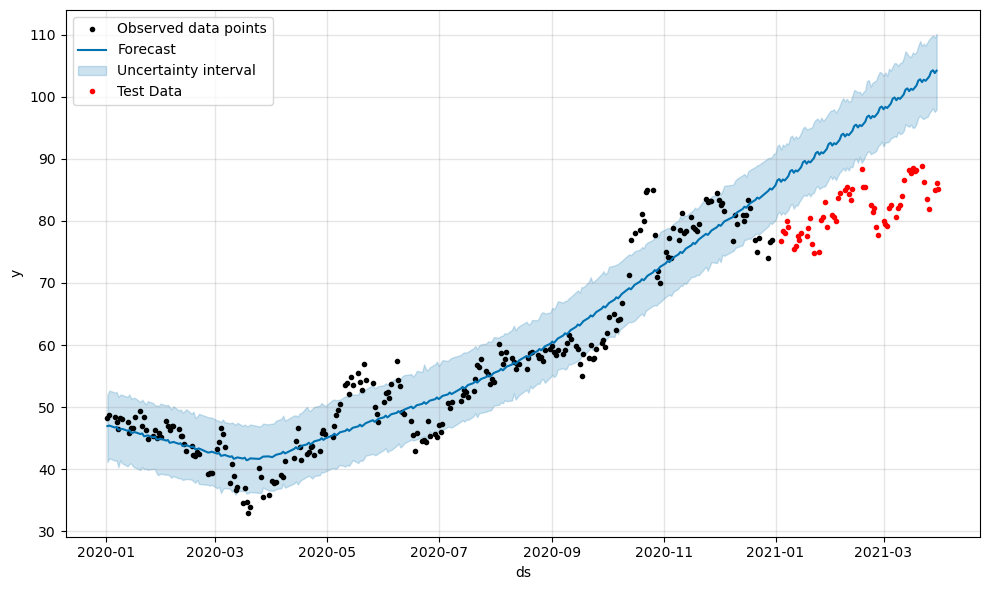

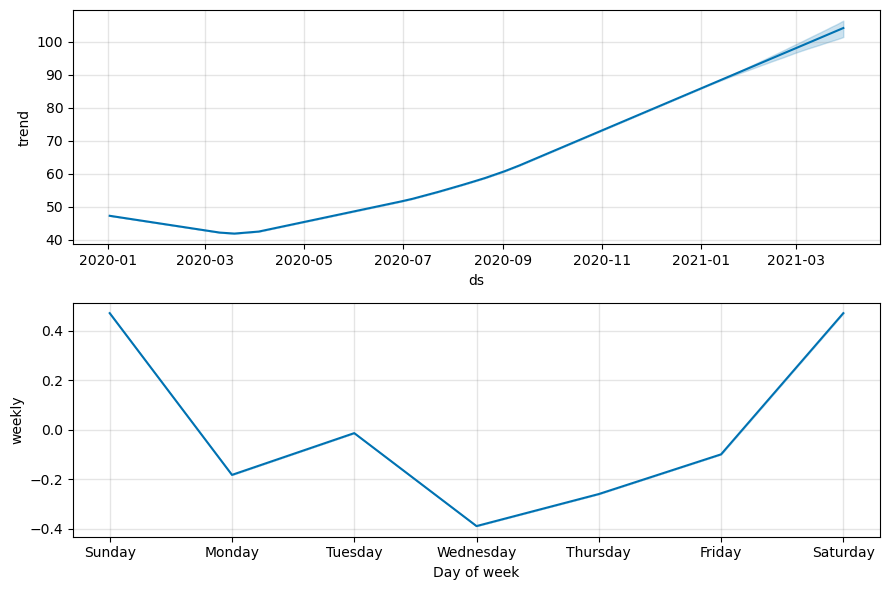

In [94]:
forecast_pamp=prophet_forecast(df_pamp_2020,df_pamp_2021)

#### Forecast for CCB

16:13:18 - cmdstanpy - INFO - Chain [1] start processing
16:13:18 - cmdstanpy - INFO - Chain [1] done processing


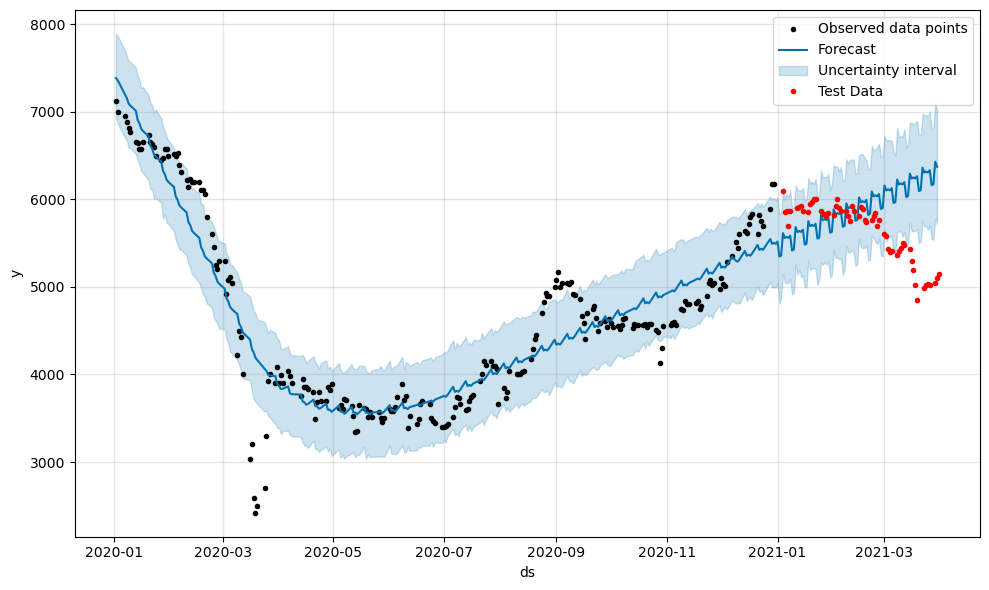

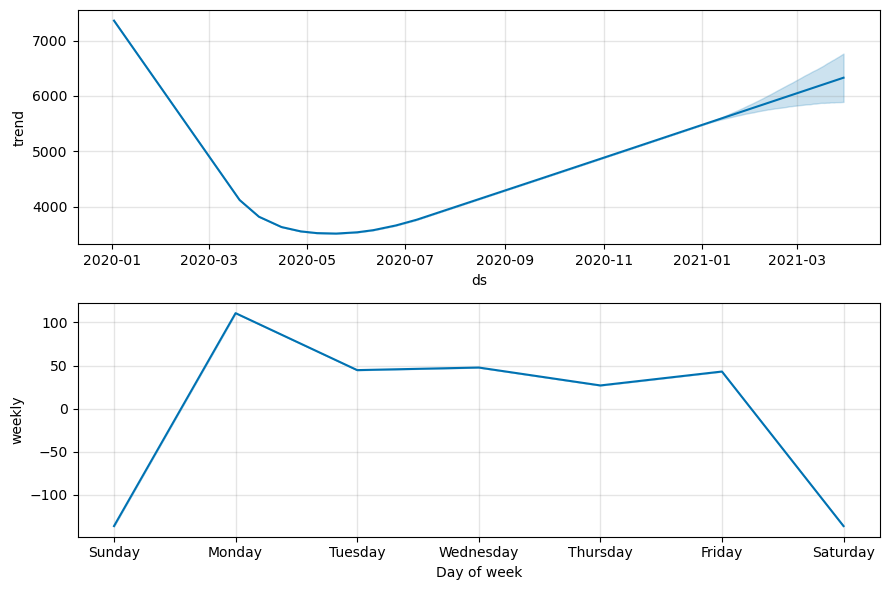

In [95]:
forecast_ccb=prophet_forecast(df_ccb_2020,df_ccb_2021)

#### Forecast for IMPJ

16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing


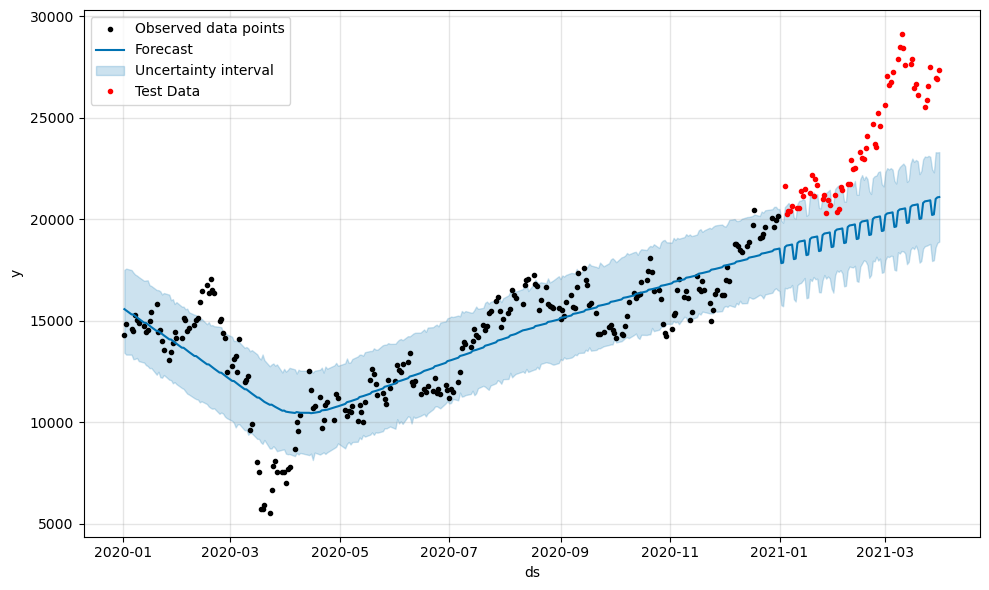

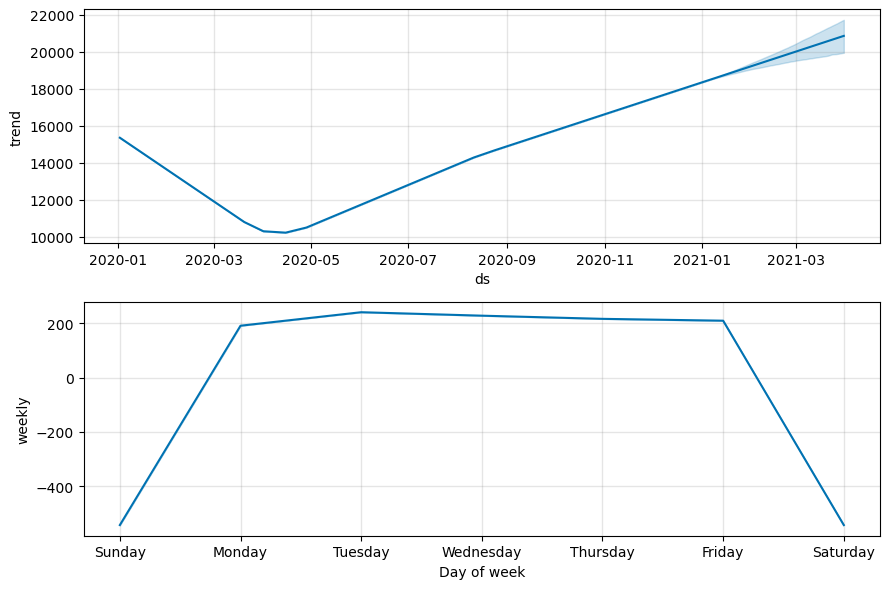

In [96]:
forecast_impj=prophet_forecast(df_impj_2020,df_impj_2021)

#### Forecast for DSMC

16:13:20 - cmdstanpy - INFO - Chain [1] start processing
16:13:20 - cmdstanpy - INFO - Chain [1] done processing


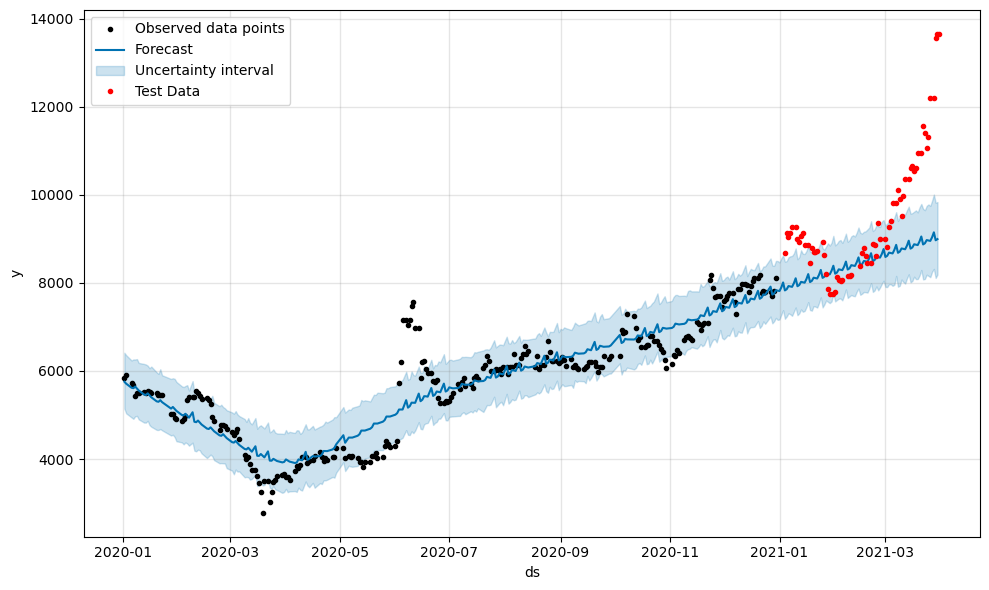

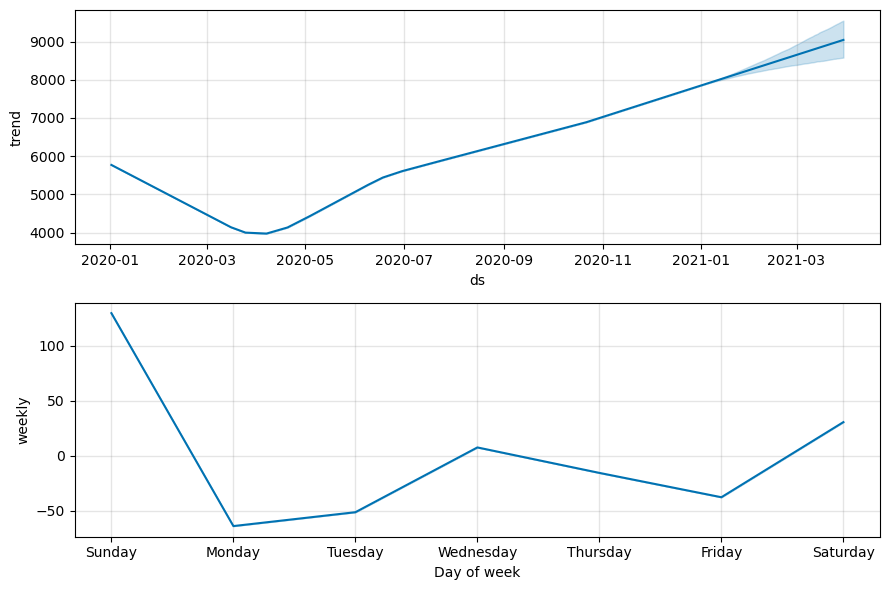

In [97]:
forecast_dsmc=prophet_forecast(df_dsmc_2020,df_dsmc_2021)